In [1]:
import pandas as pd # 資料處理
import pyarrow as py 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 匯入資料和刪除不必要的資料跟顯示 Type 以及 Missing_Data

In [3]:
data = pd.read_parquet("C:/Users/User/Desktop/airport_data/airplane_delay_detect/airline_weather_concat_1014_ver2")
data.head

<bound method NDFrame.head of           Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
0         2018        1      1          23          2  2018-01-23   
1         2018        1      1          23          2  2018-01-23   
2         2018        1      1          23          2  2018-01-23   
3         2018        1      1          24          3  2018-01-24   
4         2018        1      1          24          3  2018-01-24   
...        ...      ...    ...         ...        ...         ...   
24359483  2019        3      9           8          7  2019-09-08   
24359484  2019        3      9          12          4  2019-09-12   
24359485  2019        3      9          18          3  2019-09-18   
24359486  2019        3      9          24          2  2019-09-24   
24359487  2020        1      3          27          5  2020-03-27   

         IATA_Code_Marketing_Airline Origin Dest  \
0                                 DL    ABY  ATL   
1                                 DL 

In [4]:
data = data.drop(["Unnamed: 0"],axis=1)

In [5]:
data_info = pd.DataFrame({'unicos':data.nunique(),
                          'missing_data':data.isna().mean()*100,
                          'dtype':data.dtypes})


# 各個資料和 Delay 關係視覺化

## 地區

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


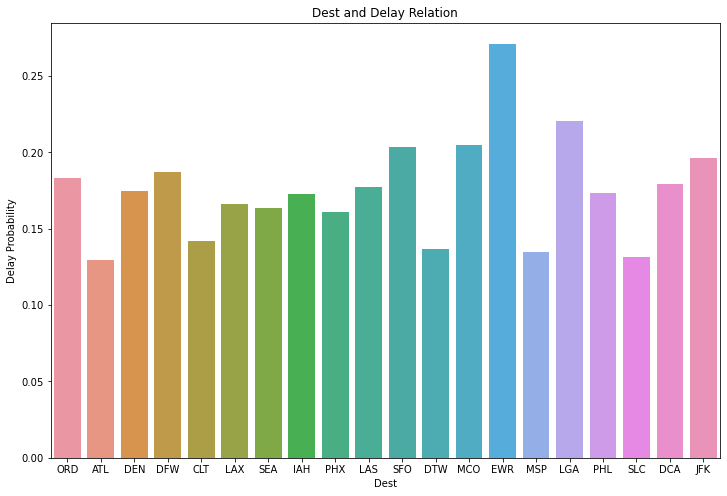

In [7]:
# 查看 Dest 和 Delay 的關係
Airport_counts = data['Dest'].value_counts()

# 查看那些出發地的頻率是最高的
Airport_counts_freq = Airport_counts / sum(Airport_counts)

# 點進去看會發現 他會按照順序
commonAirport = Airport_counts.iloc[:20].index

# 按照 Dest 進行 groupby
train_group = data.groupby('Dest')

# 計算 ArrDel15 的平均，因為沒有 Delay 就是 0，有 Delay 就是 1，然後計算平均數
# 下方兩種結果是一樣的，不一樣的點為一個是 dataframe 一個是 series，兩種寫法相對的圖表寫法就會有一點不一樣
train_mean_y = train_group['ArrDel15'].agg([lambda x:np.mean(x)]) #dataframe
# train_mean_y1 = train_group['ArrDel15'].agg('mean') #series

# 圖視覺化，把畫布物件叫出來
fig, ax = plt.subplots(figsize=(12, 8)) 

# barplot 應該是只能放 series
sns.barplot(commonAirport, train_mean_y.loc[commonAirport].values[:,0])
# sns.barplot(commonCompany, train_mean_y1[commonCompany])

plt.xlabel('Dest')
plt.ylabel('Delay Probability')
plt.title('Dest and Delay Relation')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


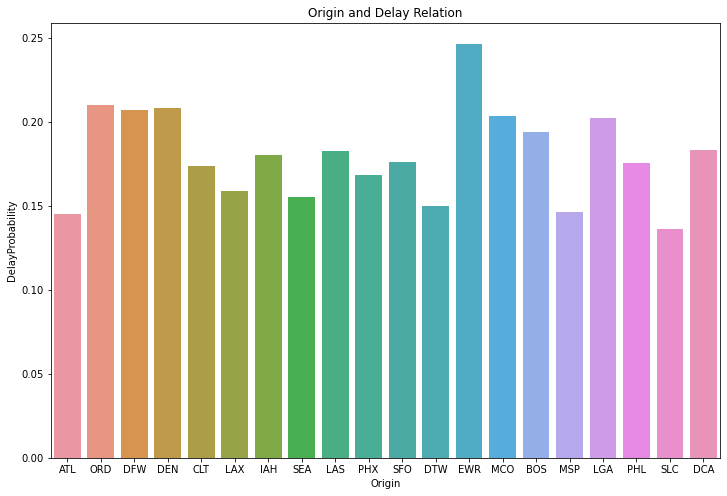

In [9]:
Airport_counts = data['Origin'].value_counts()
Airport_counts_freq = Airport_counts / sum(Airport_counts)
commonAirport = Airport_counts.iloc[:20].index
train_group = data.groupby('Origin')

train_mean_y = train_group['ArrDel15'].agg([lambda x:np.mean(x)])

fig, ax = plt.subplots(figsize=(12, 8)) 
sns.barplot(commonAirport, train_mean_y.loc[commonAirport].values[:,0])
plt.xlabel('Origin')
plt.ylabel('DelayProbability')
plt.title('Origin and Delay Relation')
plt.show()


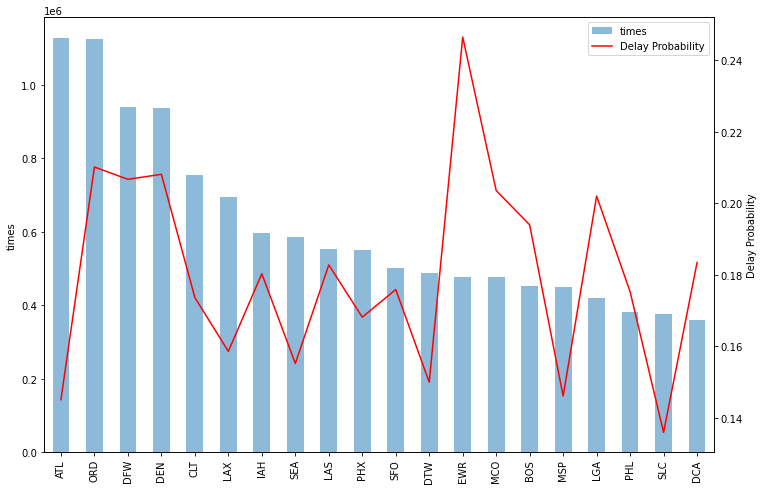

In [11]:
fig, ax1 = plt.subplots(figsize=(12, 8))
# 共同的 x 軸具有不同的 y 軸。這是通過使用 twinx() 命令完成的。
ax2 = ax1.twinx() # ax2 and ax1 will have common x axis and different y axis
Airport_counts.loc[commonAirport].plot(kind='bar', ax=ax1, alpha=0.5)
train_mean_y.loc[commonAirport].plot(ax=ax2, color='r')
ax1.set_ylabel('times')
ax2.set_ylabel('Delay Probability')
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
labels1 = ['times']
labels2 = ['Delay Probability']
plt.legend(handles1+handles2, labels1+labels2, loc='upper right')
plt.show()

## IATA 

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


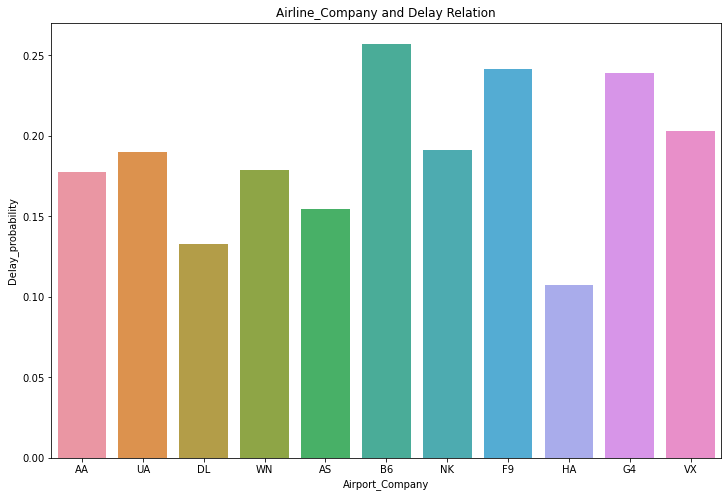

In [12]:
# 先取市占率 去看哪些值是我們值得看的
Company_counts = data['IATA_Code_Marketing_Airline'].value_counts()
Company_counts = Company_counts / Company_counts.sum()
commonCompany = Company_counts.index

# 依照 IATA 去分組
train_group = data.groupby('IATA_Code_Marketing_Airline')

# 把分組結果依照 ArrDel15 去
train_mean_y = train_group['ArrDel15'].agg([lambda x:np.mean(x)])

fig, ax = plt.subplots(figsize = (12, 8)) 
sns.barplot(commonCompany, train_mean_y.loc[commonCompany].values[:,0])
plt.xlabel('Airport_Company')
plt.ylabel('Delay_probability')
plt.title('Airline_Company and Delay Relation')
plt.show()

## 時間

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


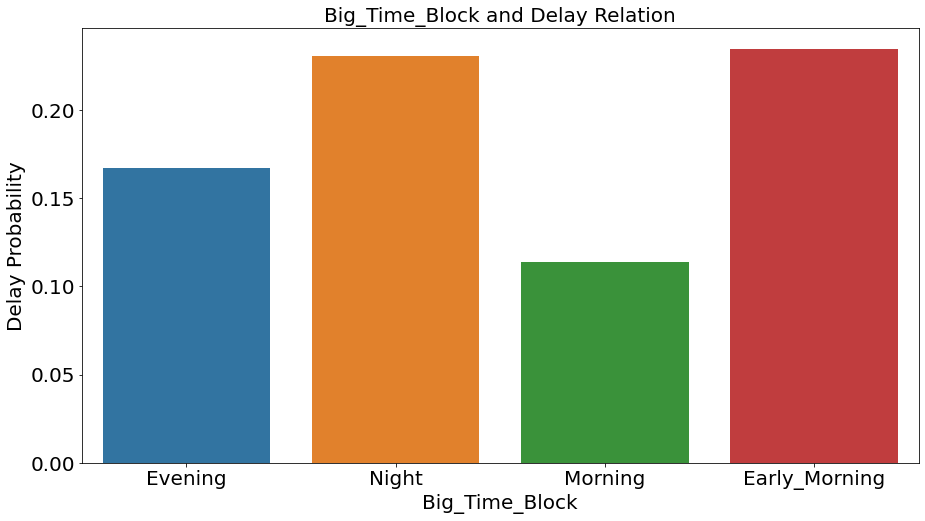

In [13]:
def arr_time(x):
    if x == '0600-0659' or x == '0700-0759' or x == '0800-0859' or x == '0900-0959' or x == '1000-1059' or x == '1100-1159' :
        return 'Morning'
    elif x == '1200-1259' or x == '1300-1359' or x == '1400-1459' or x == '1500-1559' or x == '1600-1659' or x == '1700-1759':
        return 'Evening'
    elif x == '1800-1859' or x == '1900-1959' or x == '2000-2059' or x == '2100-2159' or x == '2200-2259' or x == '2300-2359':
        return 'Night'
    else:
        return 'Early_Morning'
    
data['Big_Time_Block'] = data['ArrTimeBlk'].apply(lambda x :arr_time(x))

timeBlock = data['Big_Time_Block'].value_counts().index
train_group = data.groupby('Big_Time_Block')

train_mean_y = train_group['ArrDel15'].agg([lambda x:np.mean(x)])

fig, ax = plt.subplots(figsize = (15,8))
sns.barplot(timeBlock, train_mean_y.loc[timeBlock].values[:,0])
plt.xlabel('Big_Time_Block',fontsize=20)
plt.ylabel('Delay Probability',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Big_Time_Block and Delay Relation',fontsize=20)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


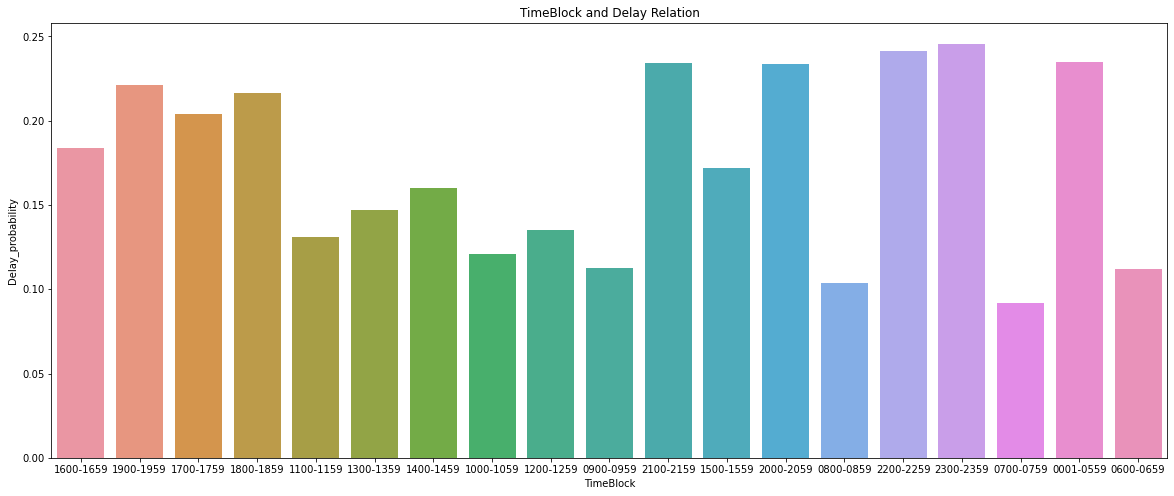

In [14]:
commonNoon = data['ArrTimeBlk'].value_counts().index
train_group = data.groupby('ArrTimeBlk')

train_mean_y = train_group['ArrDel15'].agg([lambda x:np.mean(x)])

fig, ax = plt.subplots(figsize = (20, 8)) 
sns.barplot(commonNoon, train_mean_y.loc[commonNoon].values[:,0])
plt.xlabel('TimeBlock')
plt.ylabel('Delay_probability')
plt.title('TimeBlock and Delay Relation')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


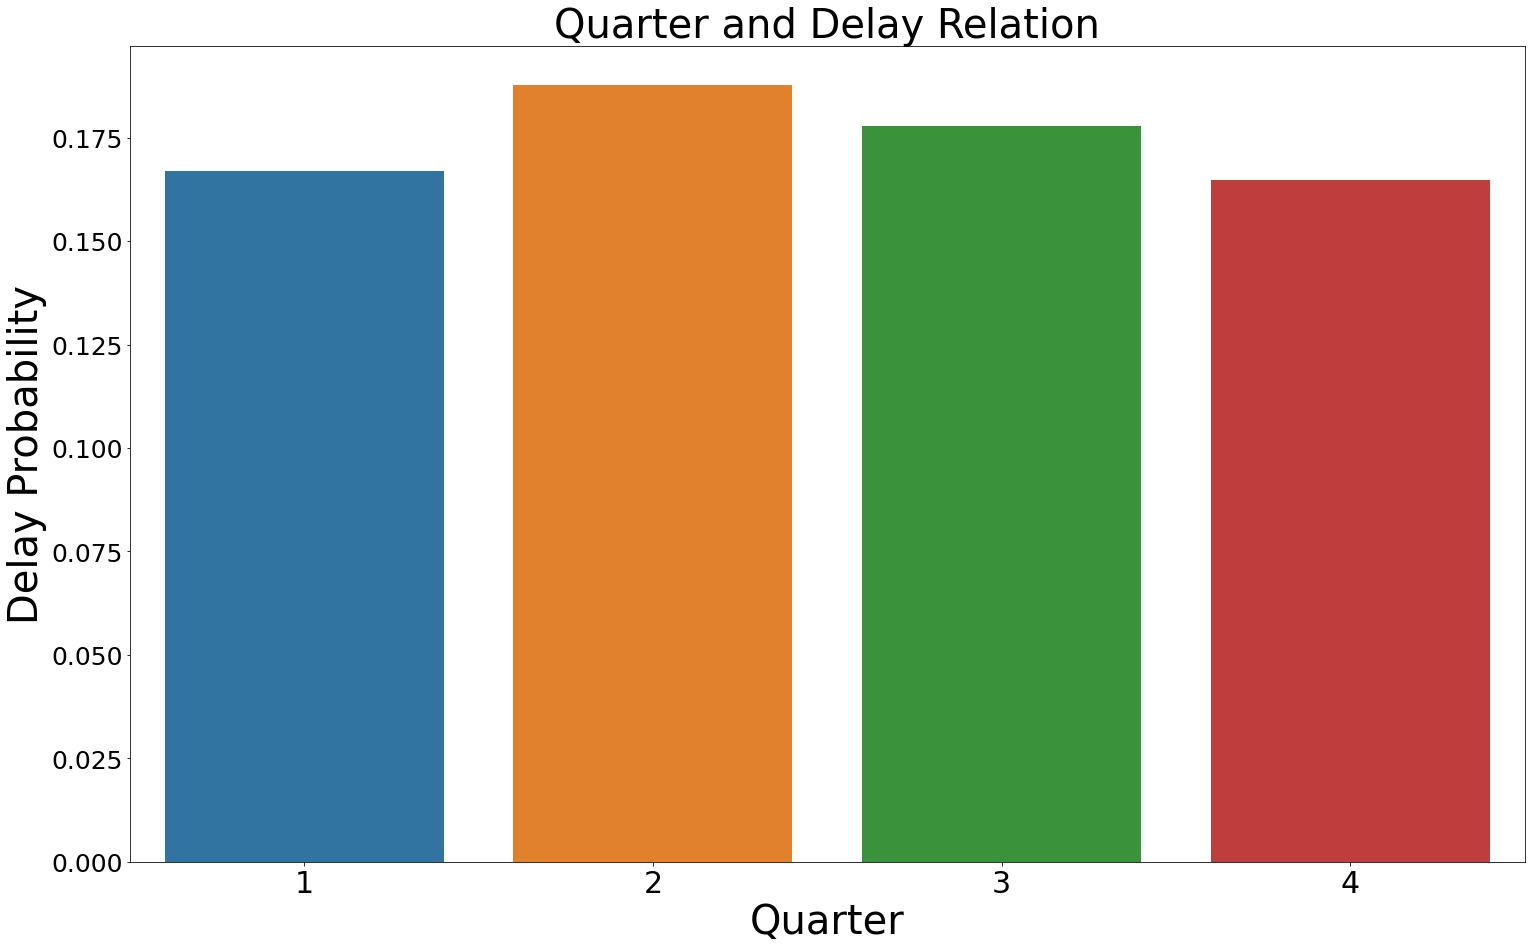

In [22]:
# 季和delay的關係
quarter = data['Quarter'].value_counts().index
train_group = data.groupby('Quarter')
train_mean_y = train_group['ArrDel15'].agg([lambda x:np.mean(x)])

fig, ax = plt.subplots(figsize = (25,15))
sns.barplot(quarter, train_mean_y.loc[quarter].values[:,0])
plt.xlabel('Quarter',fontsize=40)
plt.ylabel('Delay Probability',fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title('Quarter and Delay Relation',fontsize=40)
plt.show()

## 風

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


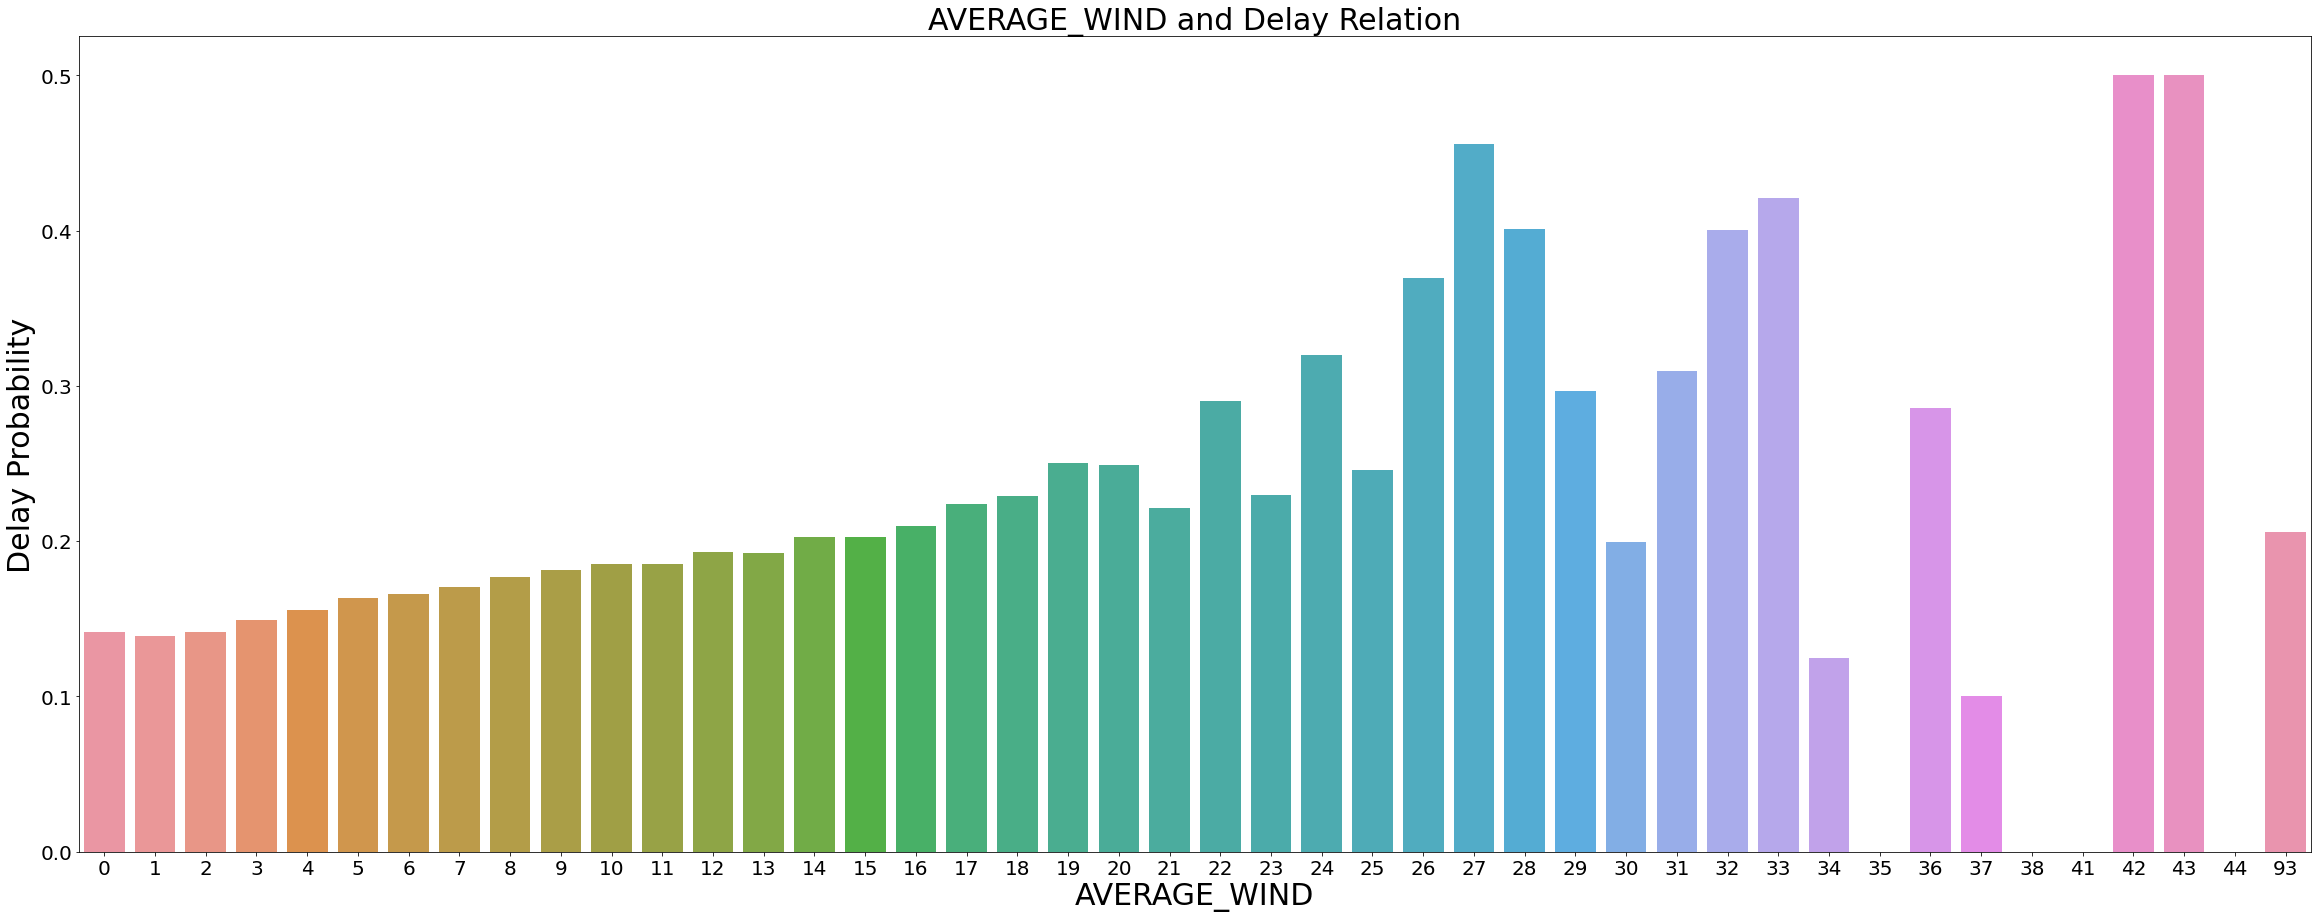

In [15]:
def awnd(x):
    if True:
        return str(x).split('.')[0]

data['AVERAGE_WIND'] = data['AWND'].apply(lambda x :awnd(x))

# average_wind = data['AVERAGE_WIND'].value_counts().index


train_group = data.groupby('AVERAGE_WIND')

train_mean_y = train_group['ArrDel15'].agg([lambda x:np.mean(x)]).rename(columns = {'<lambda>':'delay_freq'})

fig, ax = plt.subplots(figsize = (40,15))
sns.barplot([int(it) for it in train_mean_y.index], train_mean_y.values[:,0])
plt.xlabel('AVERAGE_WIND',fontsize=30)
plt.ylabel('Delay Probability',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('AVERAGE_WIND and Delay Relation',fontsize=30)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


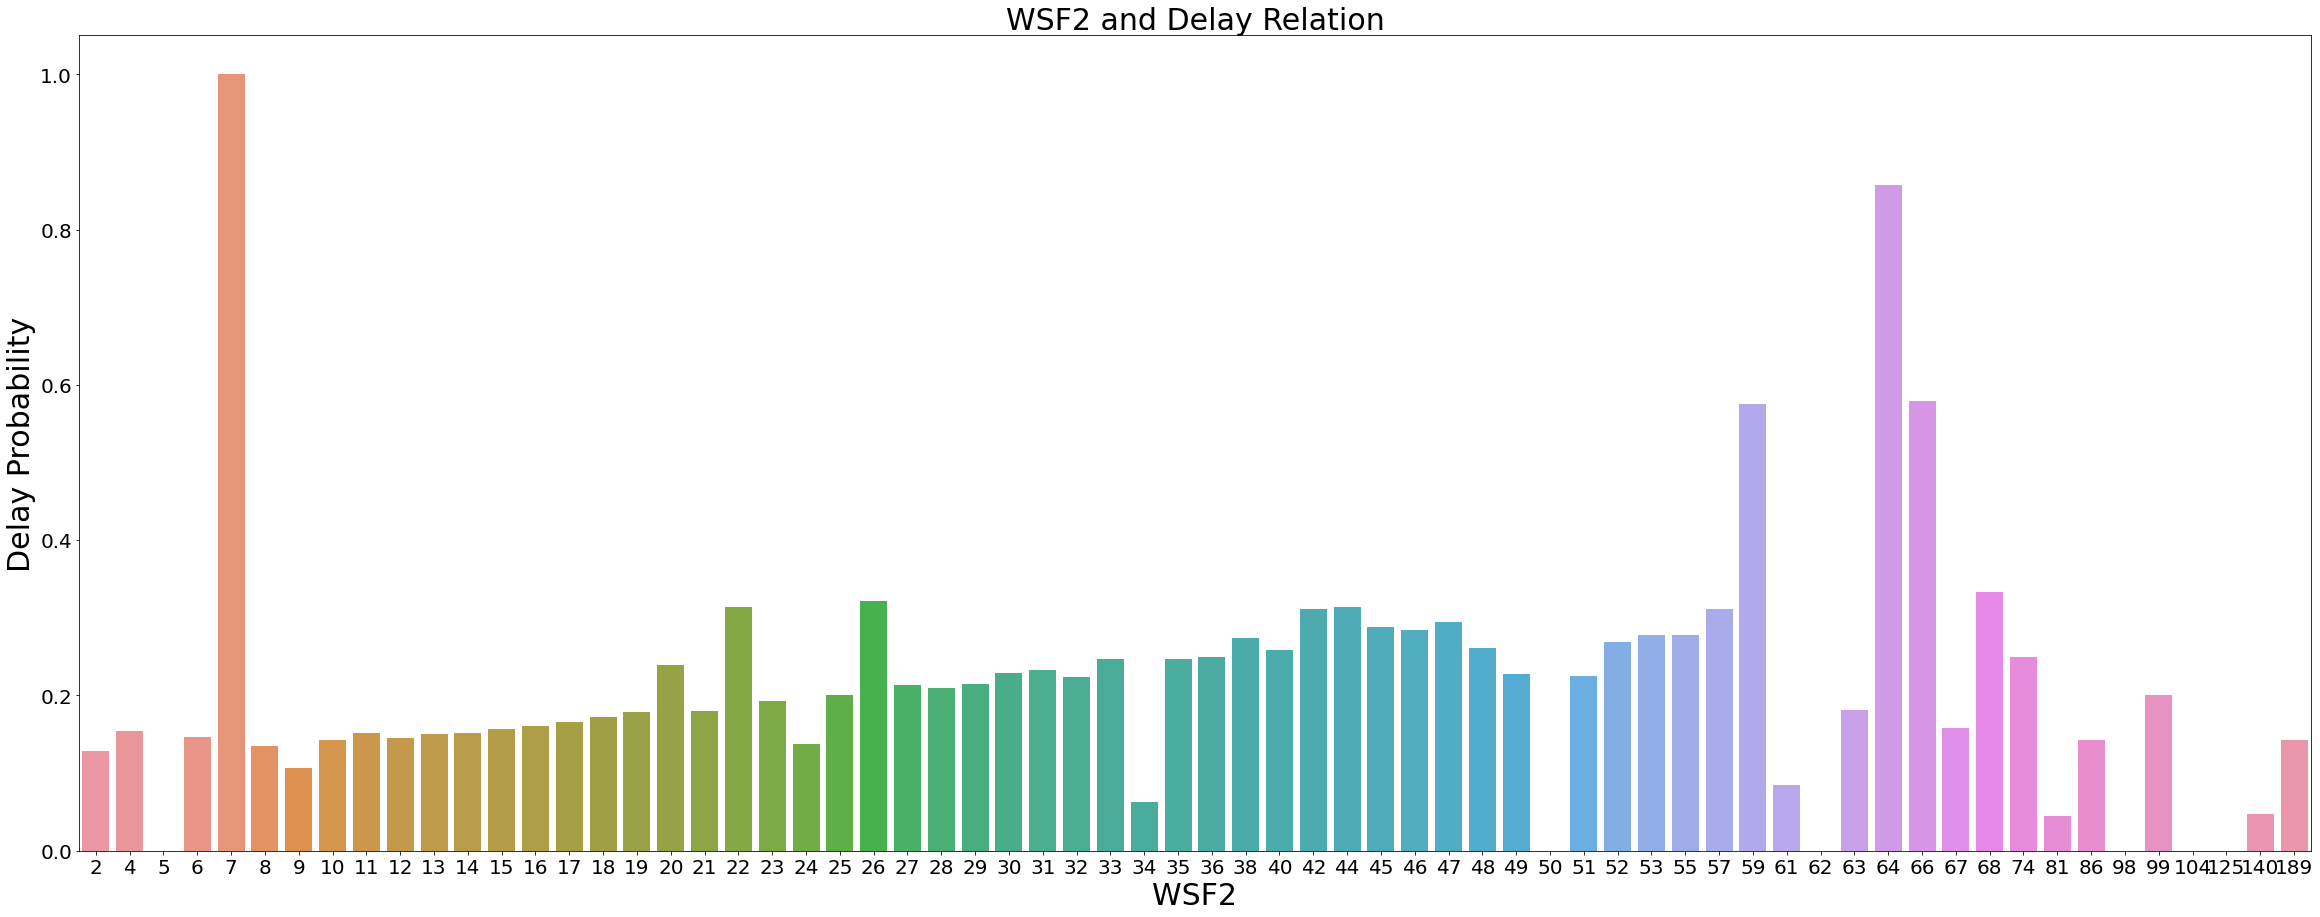

In [17]:
def WSF2(x):
    if True:
        return str(x).split('.')[0]

data['wsf2'] = data['WSF2'].apply(lambda x :WSF2(x))

# average_wind = data['wsf2'].value_counts().index

train_group = data.groupby('wsf2')

train_mean_y = train_group['ArrDel15'].agg([lambda x:np.mean(x)]).rename(columns = {'<lambda>':'delay_freq'})

fig, ax = plt.subplots(figsize = (40,15))
sns.barplot([int(it) for it in train_mean_y.index], train_mean_y.values[:,0])
plt.xlabel('WSF2',fontsize=30)
plt.ylabel('Delay Probability',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('WSF2 and Delay Relation',fontsize=30)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


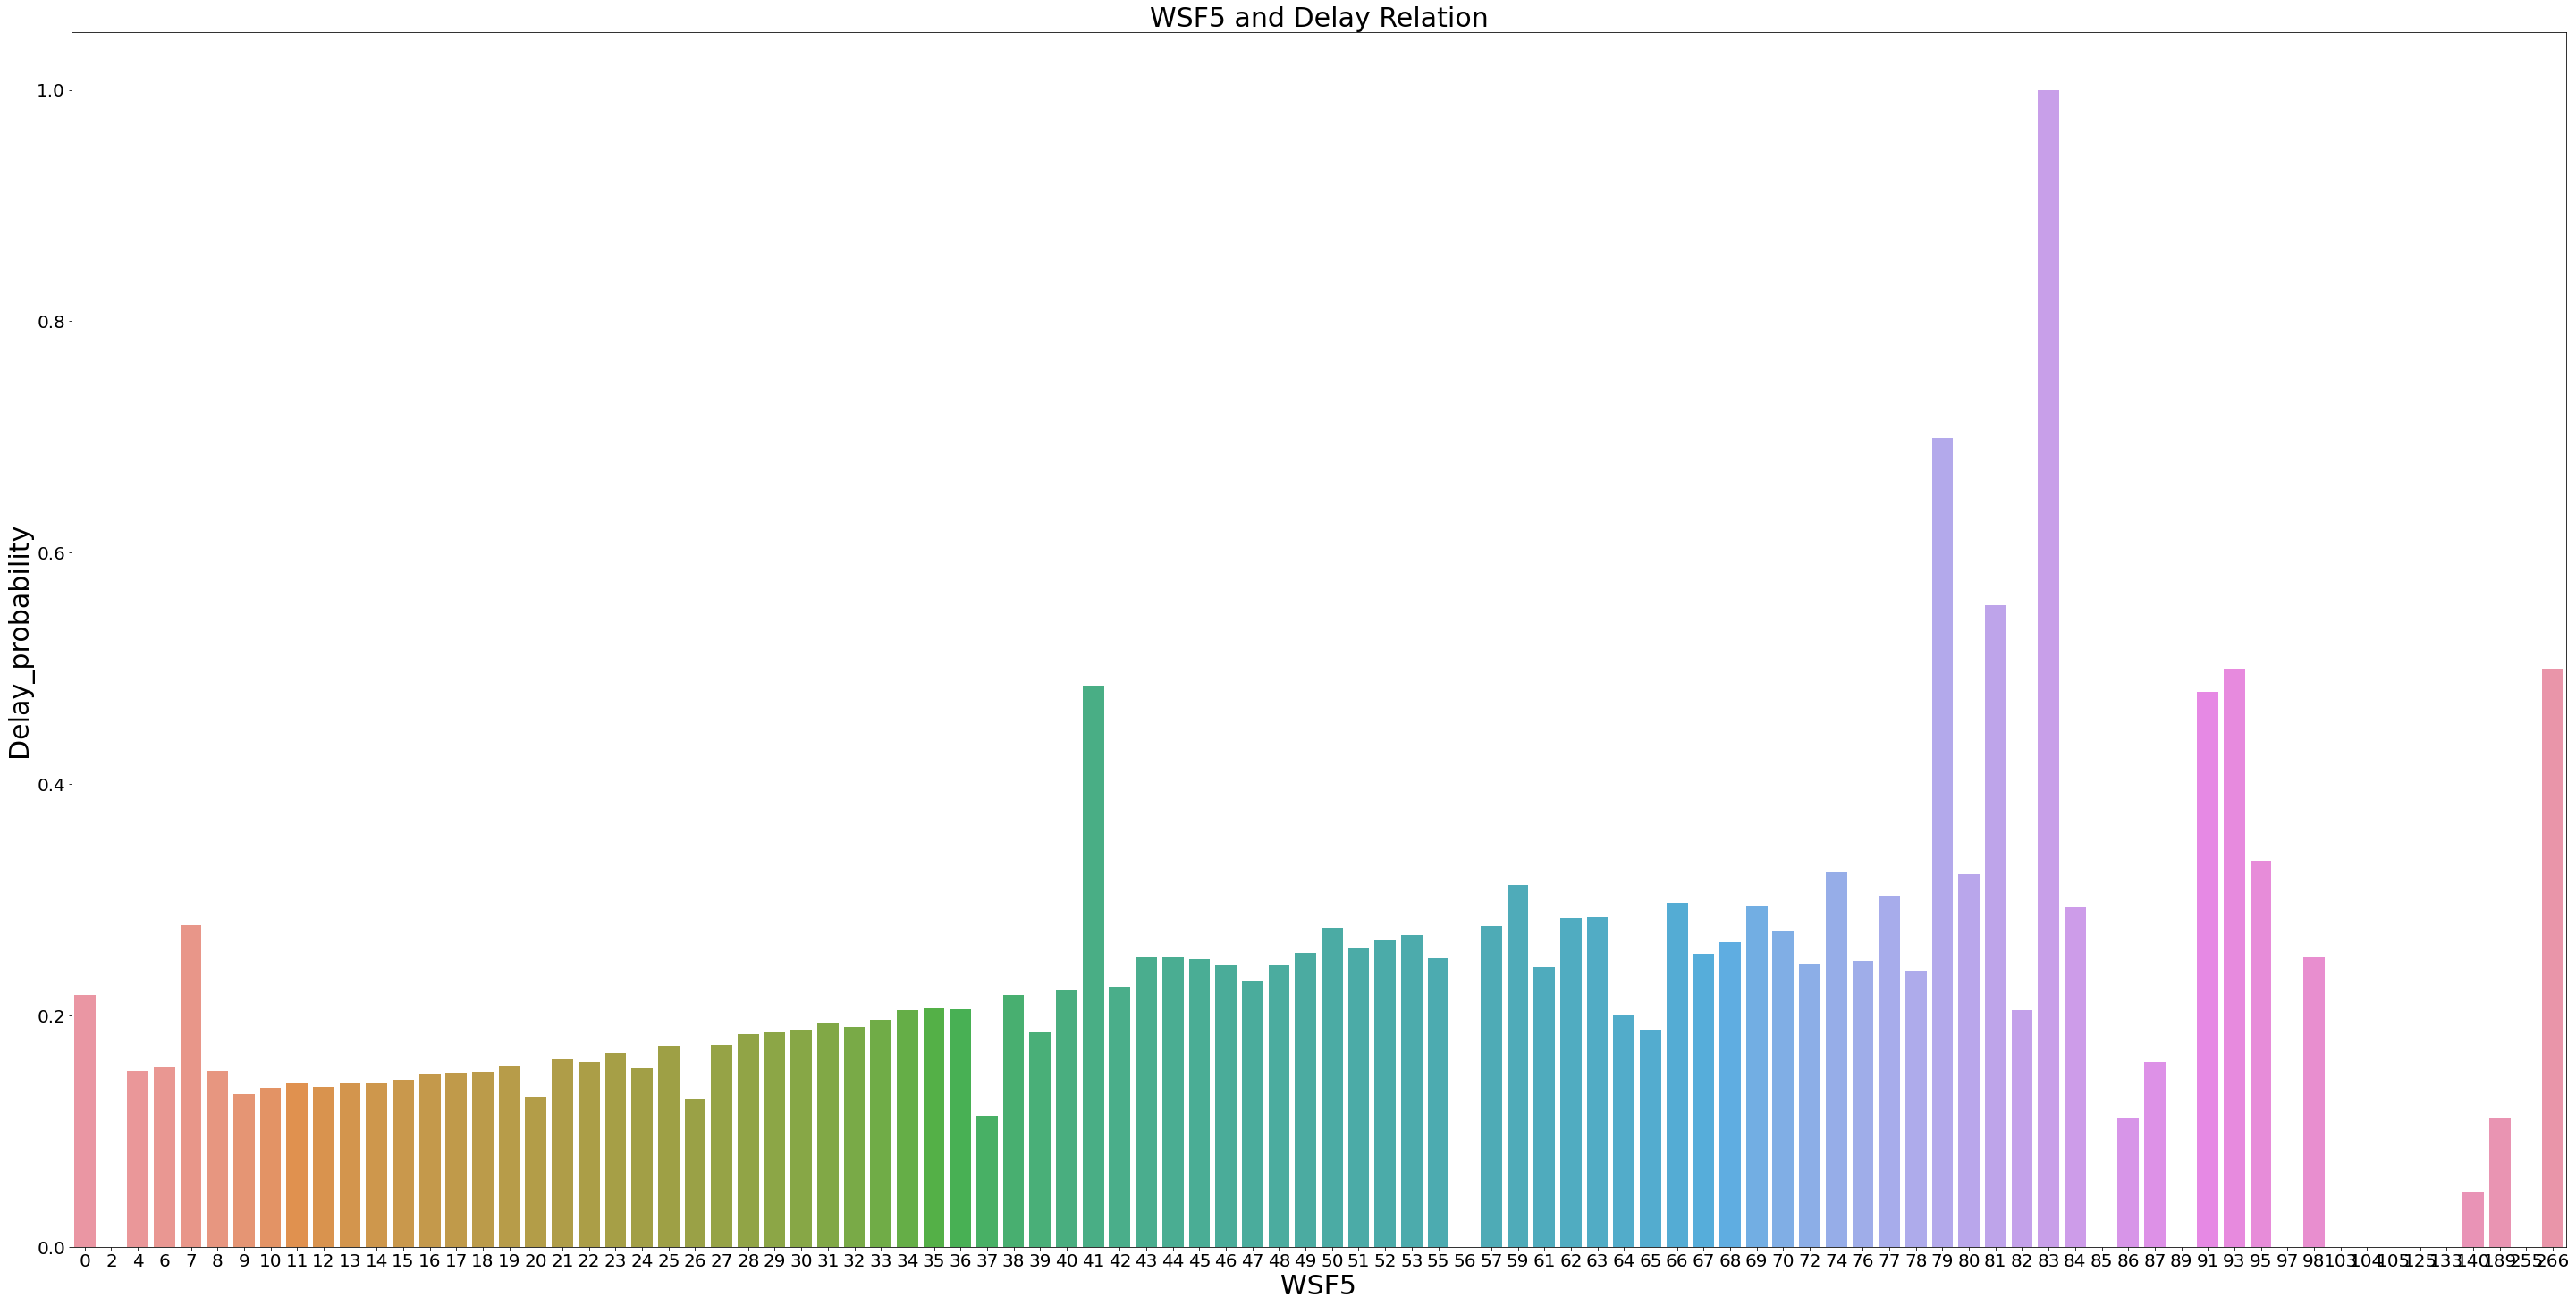

In [18]:
def WSF5(x):
    if True:
        return str(x).split('.')[0]

data['wsf5'] = data['WSF5'].apply(lambda x :WSF2(x))

average_wind = data['wsf5'].value_counts().index

train_group = data.groupby('wsf5')

train_mean_y = train_group['ArrDel15'].agg([lambda x:np.mean(x)]).rename(columns = {'<lambda>':'delay_freq'})

fig, ax = plt.subplots(figsize = (50,25))
sns.barplot([int(it) for it in train_mean_y.index], train_mean_y.values[:,0])
plt.xlabel('WSF5',fontsize=30)
plt.ylabel('Delay_probability',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('WSF5 and Delay Relation',fontsize=30)
plt.show()

## 降雨

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


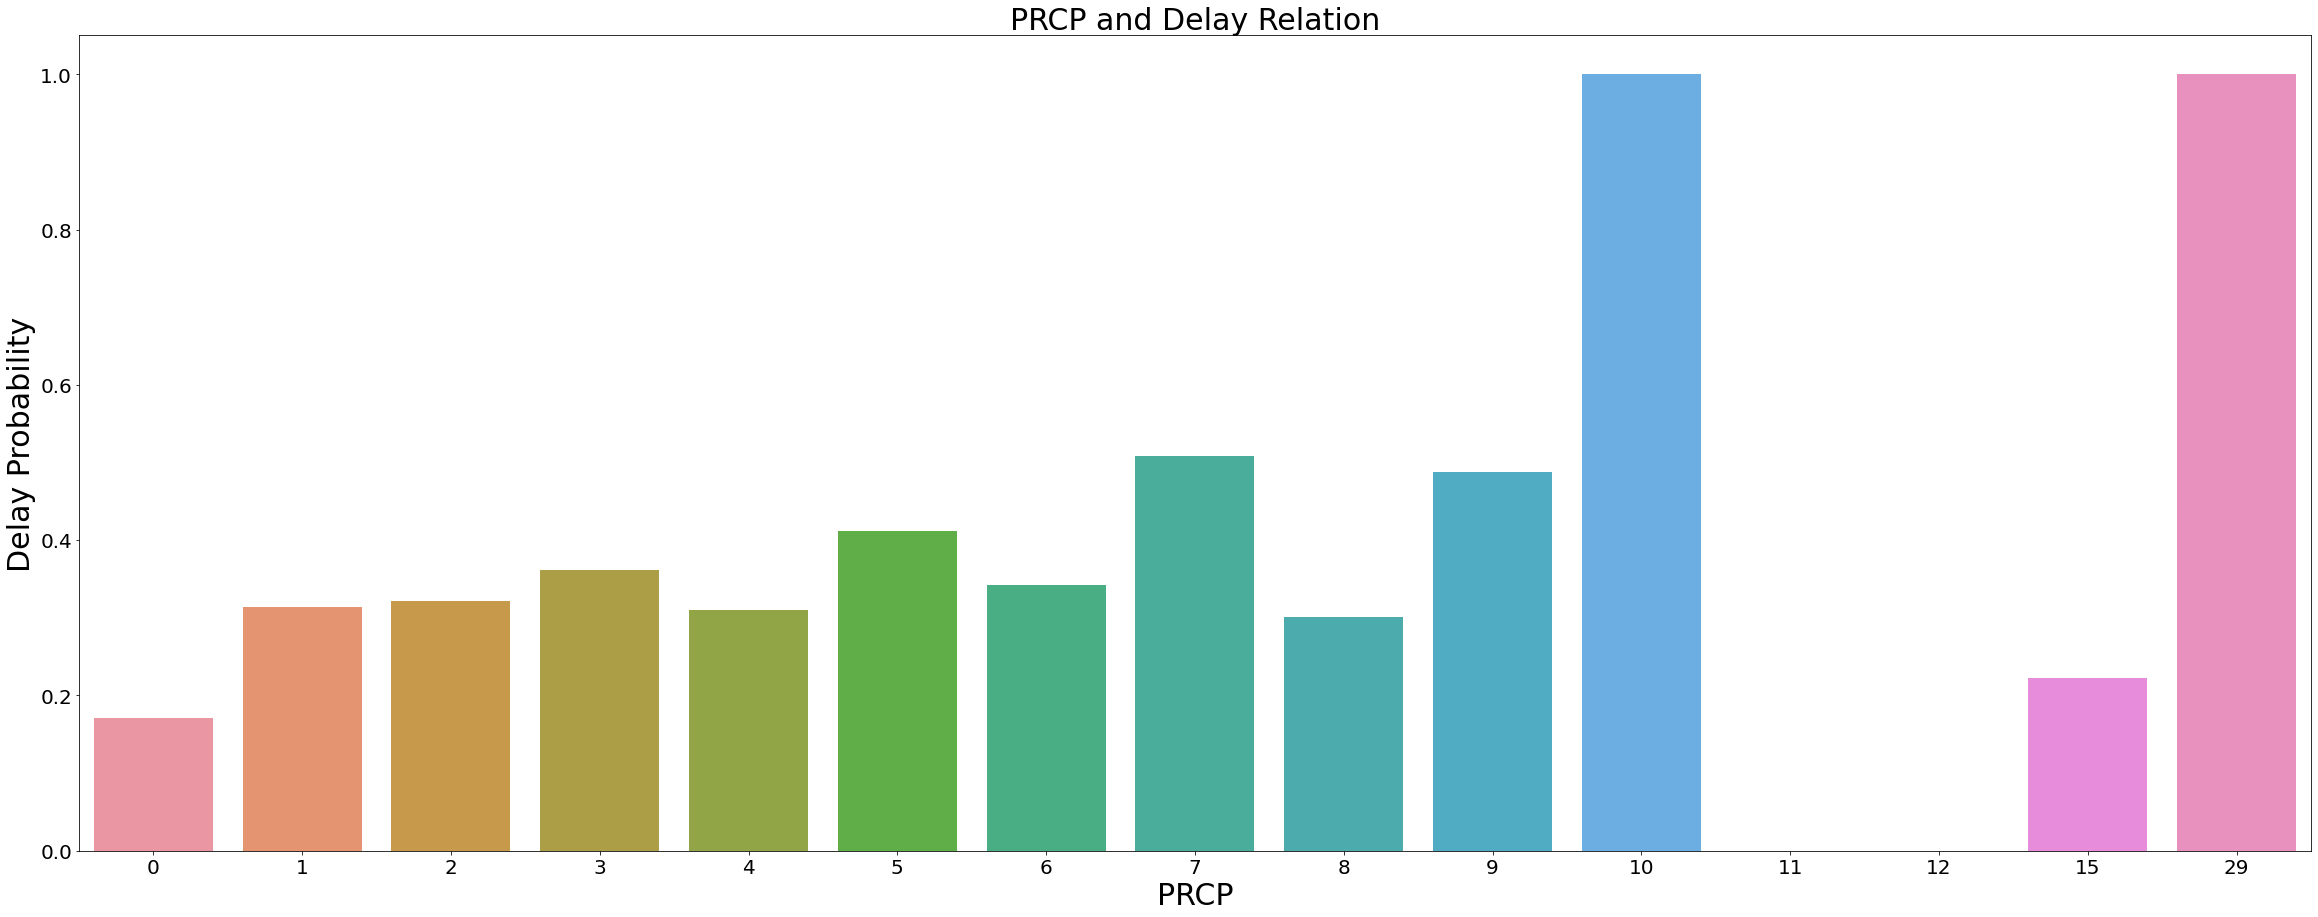

In [16]:
def prcp(x):
    if True:
        return str(x).split('.')[0]

data['prcp'] = data['PRCP'].apply(lambda x :awnd(x))

# average_wind = data['prcp'].value_counts().index

train_group = data.groupby('prcp')

train_mean_y = train_group['ArrDel15'].agg([lambda x:np.mean(x)]).rename(columns = {'<lambda>':'delay_freq'})

fig, ax = plt.subplots(figsize = (40,15))
sns.barplot([int(it) for it in train_mean_y.index], train_mean_y.values[:,0])
plt.xlabel('PRCP',fontsize=30)
plt.ylabel('Delay Probability',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('PRCP and Delay Relation',fontsize=30)
plt.show()


## 降雪

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


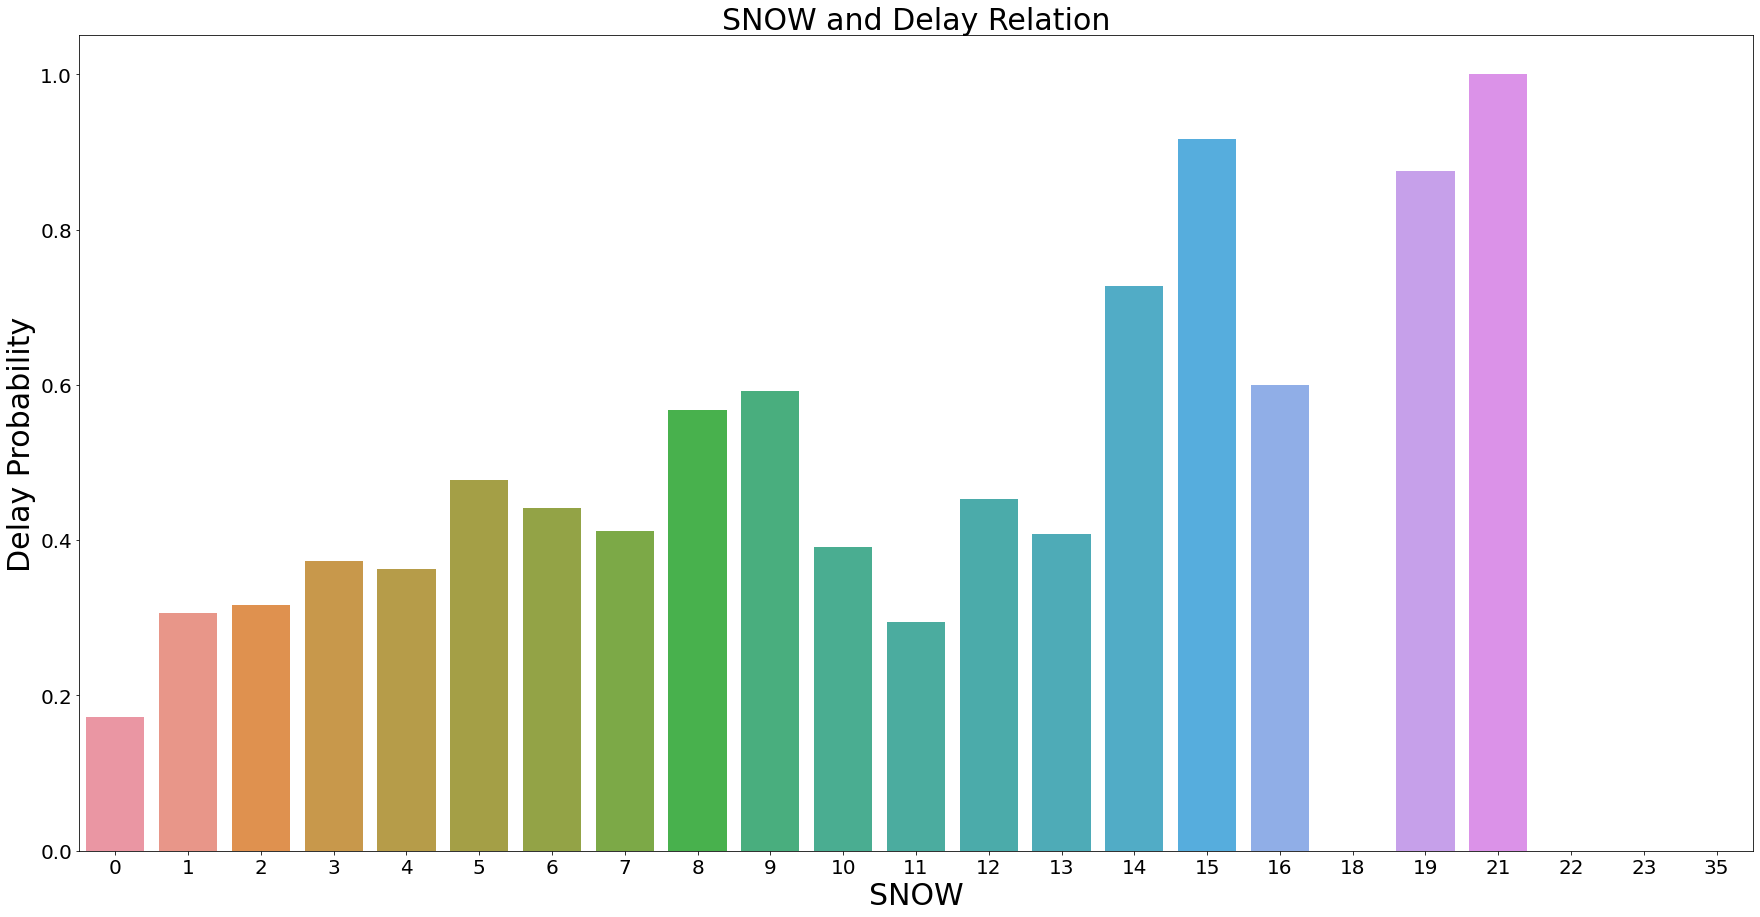

In [19]:
def snow(x):
    if True:
        return str(x).split('.')[0]

data['snow'] = data['SNOW'].apply(lambda x :snow(x))
# snow = data['snow'].value_counts().index

train_group = data.groupby('snow')

train_mean_y = train_group['ArrDel15'].agg([lambda x:np.mean(x)]).rename(columns = {'<lambda>':'delay_freq'})

fig, ax = plt.subplots(figsize = (30,15))
sns.barplot([int(it) for it in train_mean_y.index], train_mean_y.values[:,0])
plt.xlabel('SNOW',fontsize=30)
plt.ylabel('Delay Probability',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('SNOW and Delay Relation',fontsize=30)
plt.show()

## 飛機本身的各種資訊

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


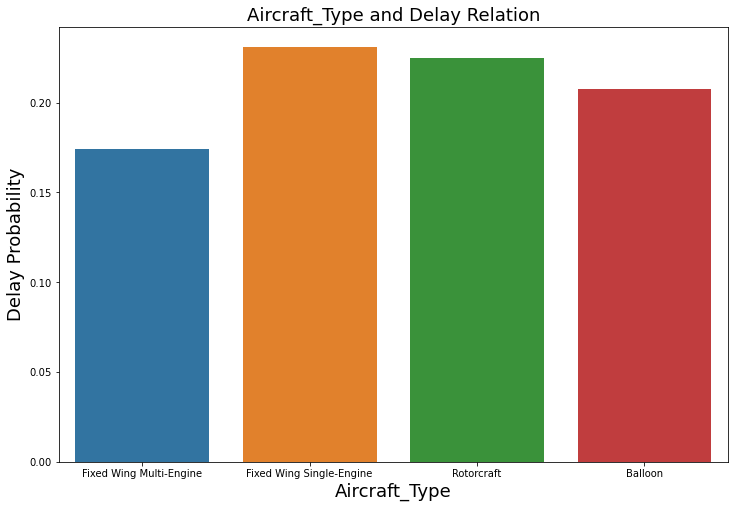

In [20]:
aircraft_type = data['Type Aircraft'].value_counts()
aircraft_counts = aircraft_type / aircraft_type.sum()
commonAircraft = aircraft_counts.iloc[:20].index
train_group = data.groupby('Type Aircraft')

train_mean_y = train_group['ArrDel15'].agg([lambda x:np.mean(x)])

fig, ax = plt.subplots(figsize = (12, 8)) 
sns.barplot(commonAircraft, train_mean_y.loc[commonAircraft].values[:,0])
plt.xlabel('Aircraft_Type',fontsize=18)
plt.ylabel('Delay Probability',fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Aircraft_Type and Delay Relation',fontsize=18)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


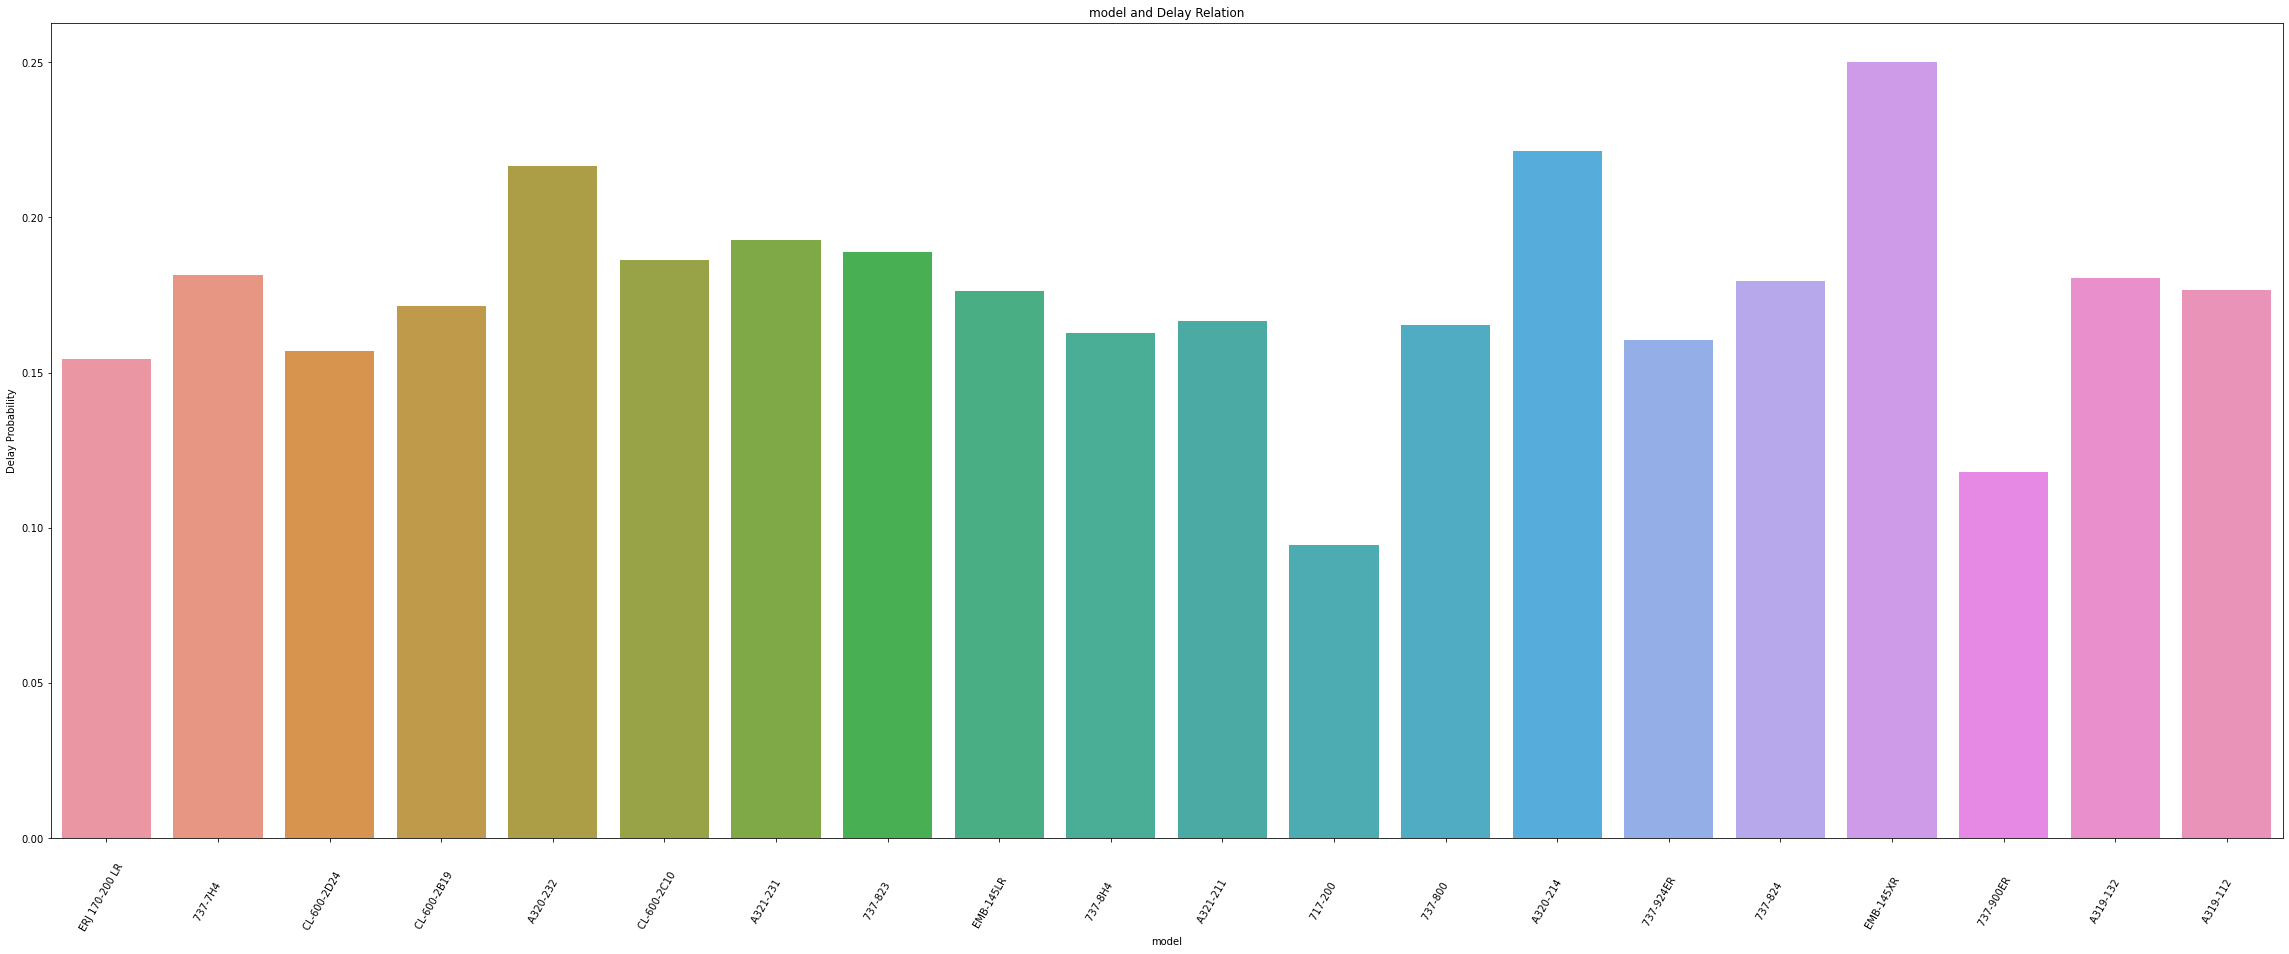

In [21]:
# 型號和delay之間影響關係
model_counts = data['Model'].value_counts()
model_freq = model_counts / sum(model_counts)
# 點進去看會發現 他會按照順序
commonModel = model_freq.iloc[:20].index

train_group = data.groupby('Model')
train_mean_y = train_group['ArrDel15'].agg([lambda x:np.mean(x)])

fig, ax = plt.subplots(figsize = (40,15))
sns.barplot(commonModel, train_mean_y.loc[commonModel].values[:,0])
plt.xlabel('model')
plt.ylabel('Delay Probability')
plt.xticks(rotation = 60)
plt.title('model and Delay Relation')
plt.show()

## WTXX

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


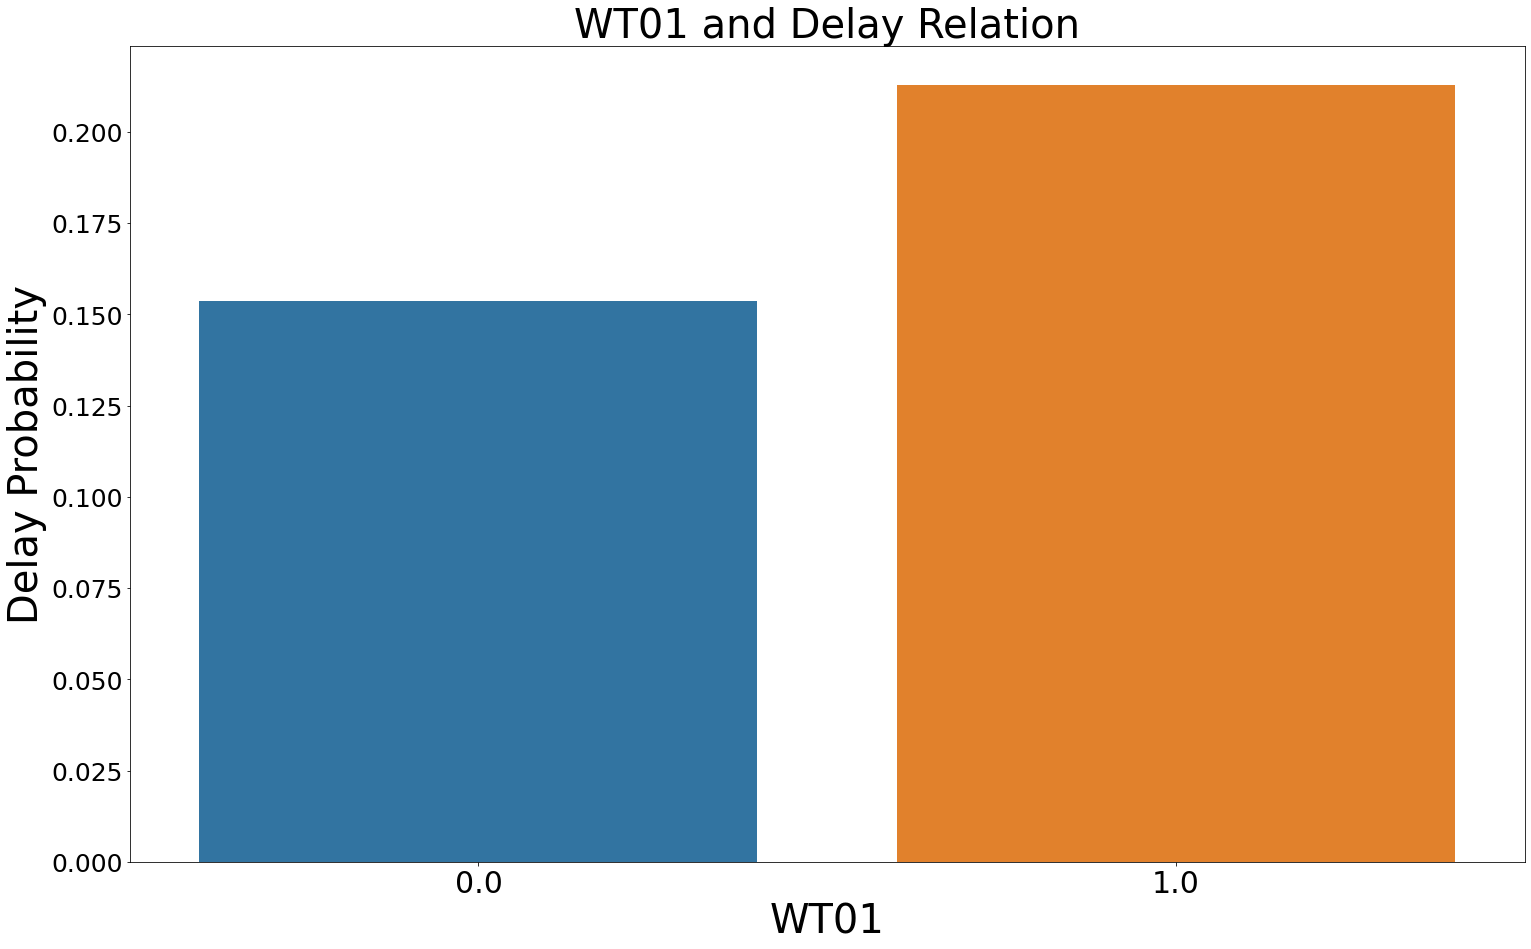

In [24]:
wtxx = data['WT01'].value_counts().index
train_group = data.groupby('WT01')
train_mean_y = train_group['ArrDel15'].agg([lambda x:np.mean(x)])

fig, ax = plt.subplots(figsize = (25,15))
sns.barplot(wtxx, train_mean_y.loc[quarter].values[:,0])
plt.xlabel('WT01',fontsize=40)
plt.ylabel('Delay Probability',fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title('WT01 and Delay Relation',fontsize=40)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


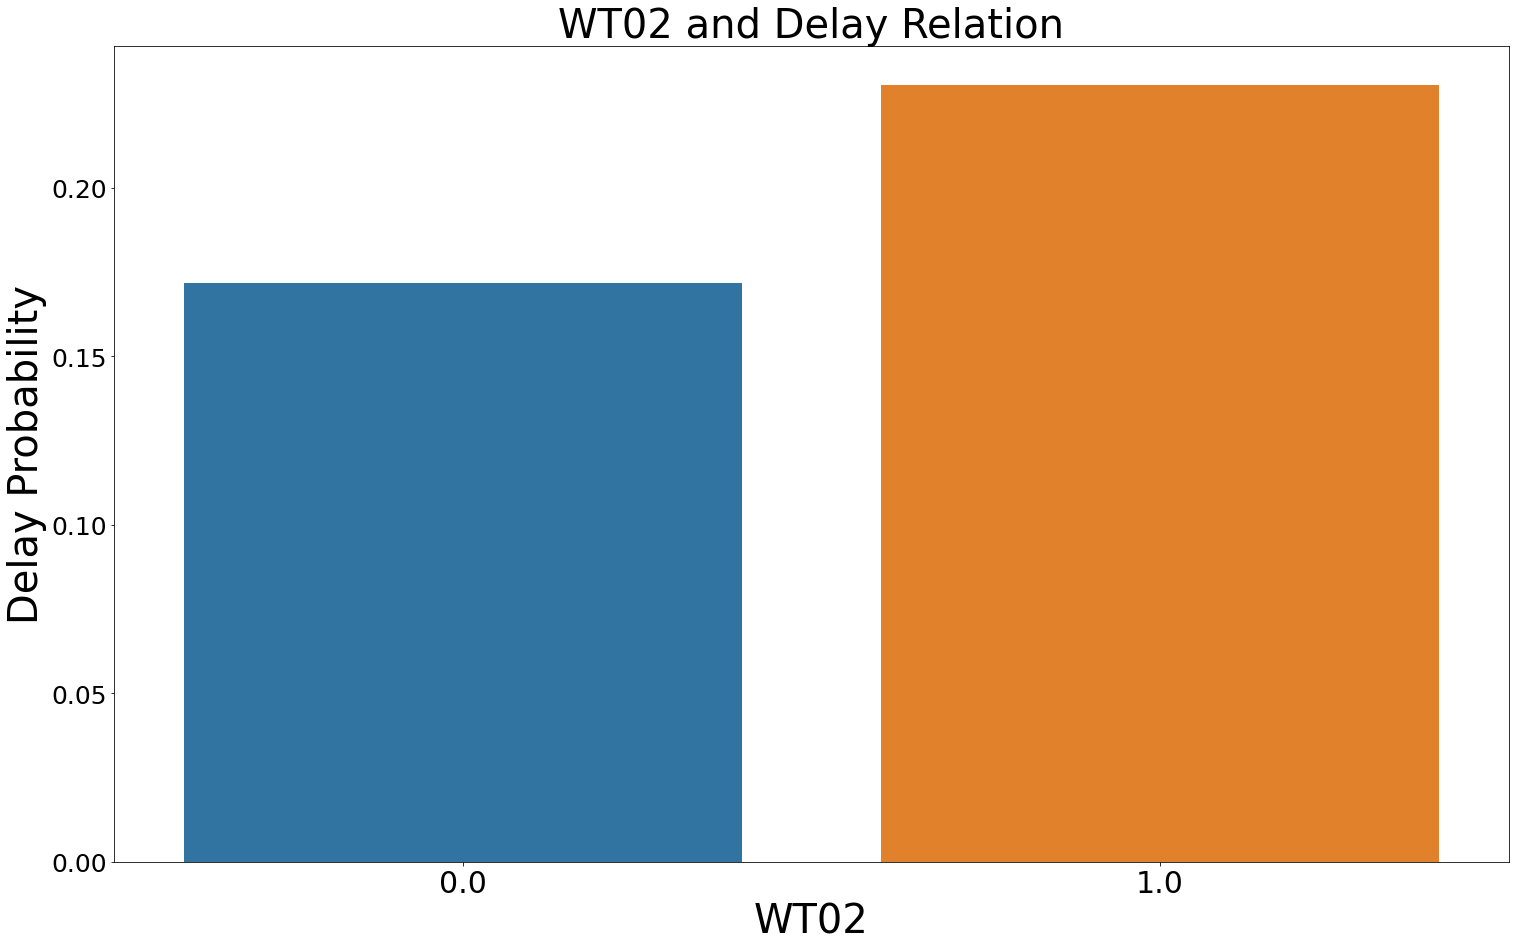

In [25]:
wtxx = data['WT02'].value_counts().index
train_group = data.groupby('WT02')
train_mean_y = train_group['ArrDel15'].agg([lambda x:np.mean(x)])

fig, ax = plt.subplots(figsize = (25,15))
sns.barplot(wtxx, train_mean_y.loc[quarter].values[:,0])
plt.xlabel('WT02',fontsize=40)
plt.ylabel('Delay Probability',fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title('WT02 and Delay Relation',fontsize=40)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


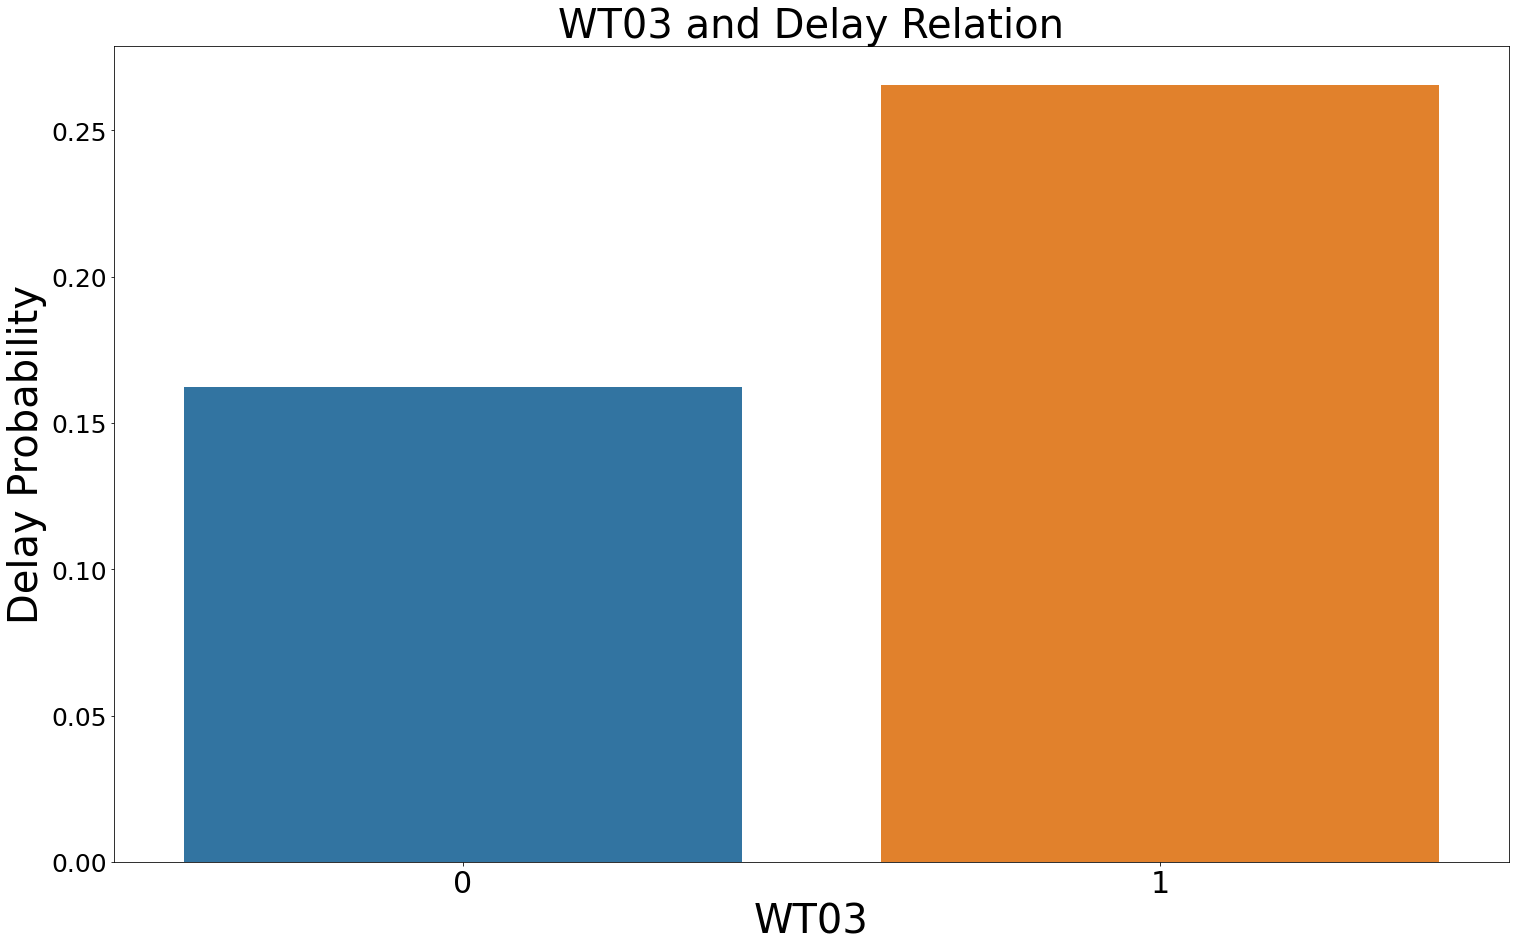

In [26]:
wtxx = data['WT03'].value_counts().index
train_group = data.groupby('WT03')
train_mean_y = train_group['ArrDel15'].agg([lambda x:np.mean(x)])

fig, ax = plt.subplots(figsize = (25,15))
sns.barplot(wtxx, train_mean_y.loc[quarter].values[:,0])
plt.xlabel('WT03',fontsize=40)
plt.ylabel('Delay Probability',fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title('WT03 and Delay Relation',fontsize=40)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


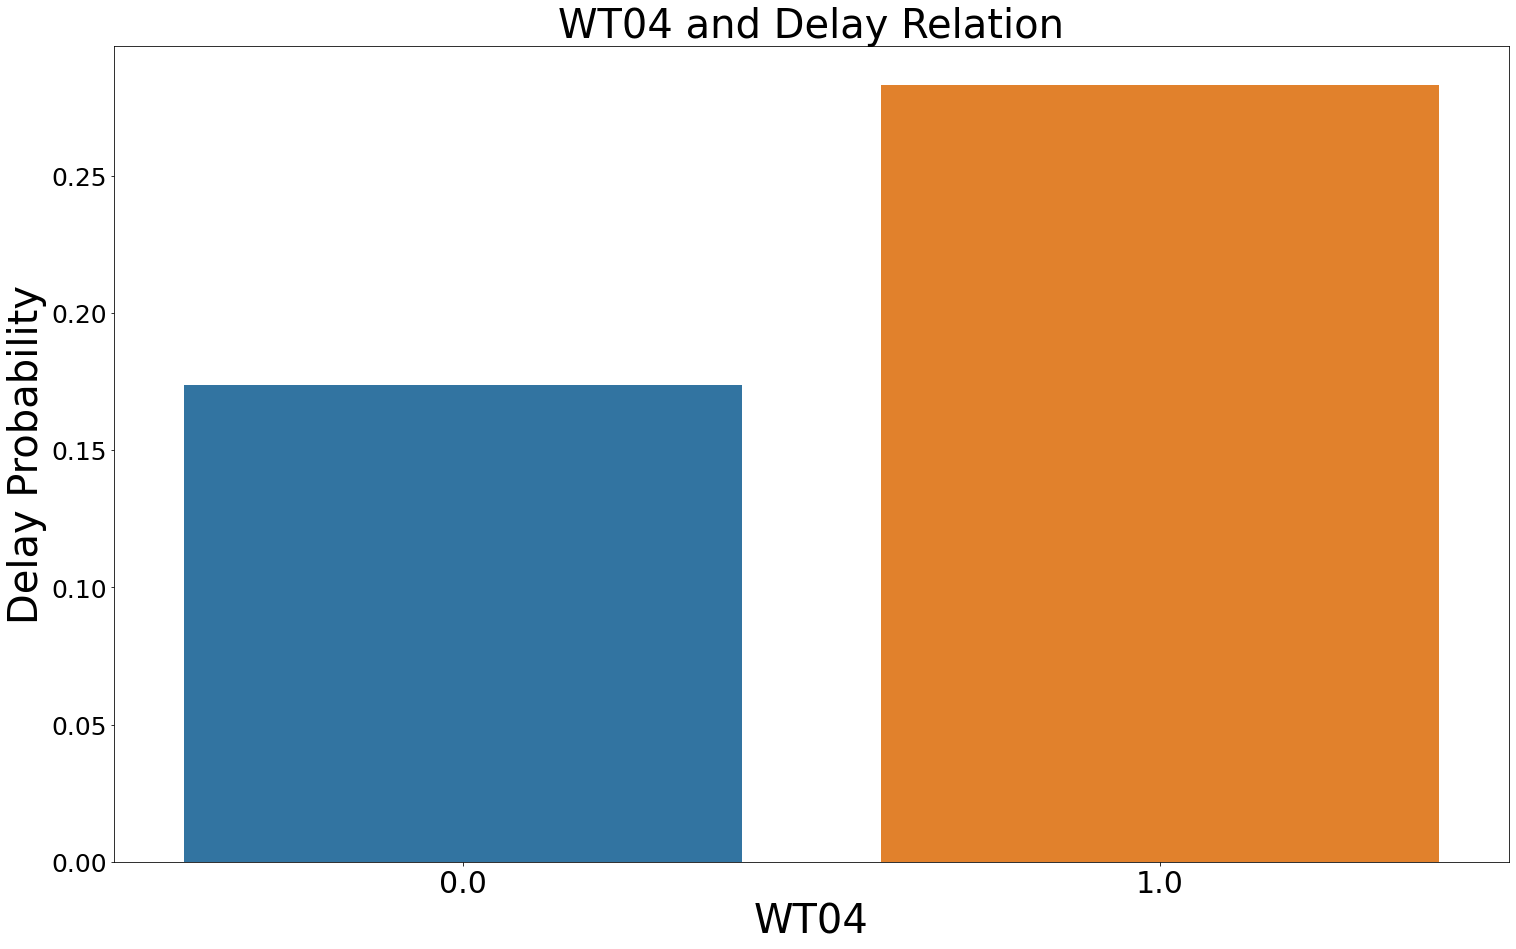

In [27]:
wtxx = data['WT04'].value_counts().index
train_group = data.groupby('WT04')
train_mean_y = train_group['ArrDel15'].agg([lambda x:np.mean(x)])

fig, ax = plt.subplots(figsize = (25,15))
sns.barplot(wtxx, train_mean_y.loc[quarter].values[:,0])
plt.xlabel('WT04',fontsize=40)
plt.ylabel('Delay Probability',fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title('WT04 and Delay Relation',fontsize=40)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


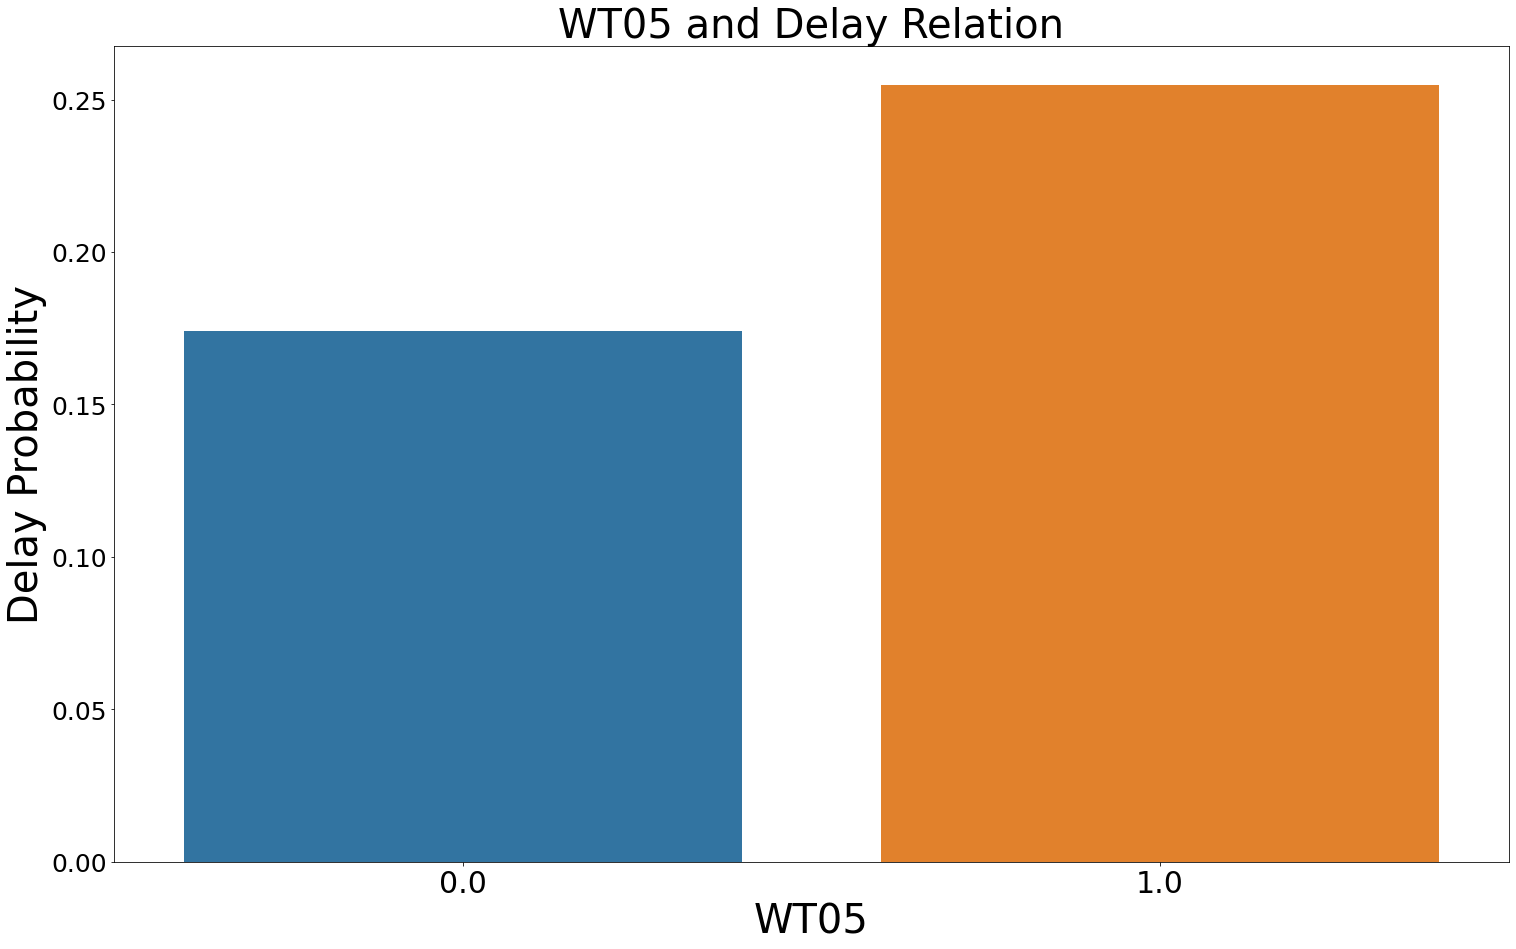

In [28]:
wtxx = data['WT05'].value_counts().index
train_group = data.groupby('WT05')
train_mean_y = train_group['ArrDel15'].agg([lambda x:np.mean(x)])

fig, ax = plt.subplots(figsize = (25,15))
sns.barplot(wtxx, train_mean_y.loc[quarter].values[:,0])
plt.xlabel('WT05',fontsize=40)
plt.ylabel('Delay Probability',fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title('WT05 and Delay Relation',fontsize=40)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


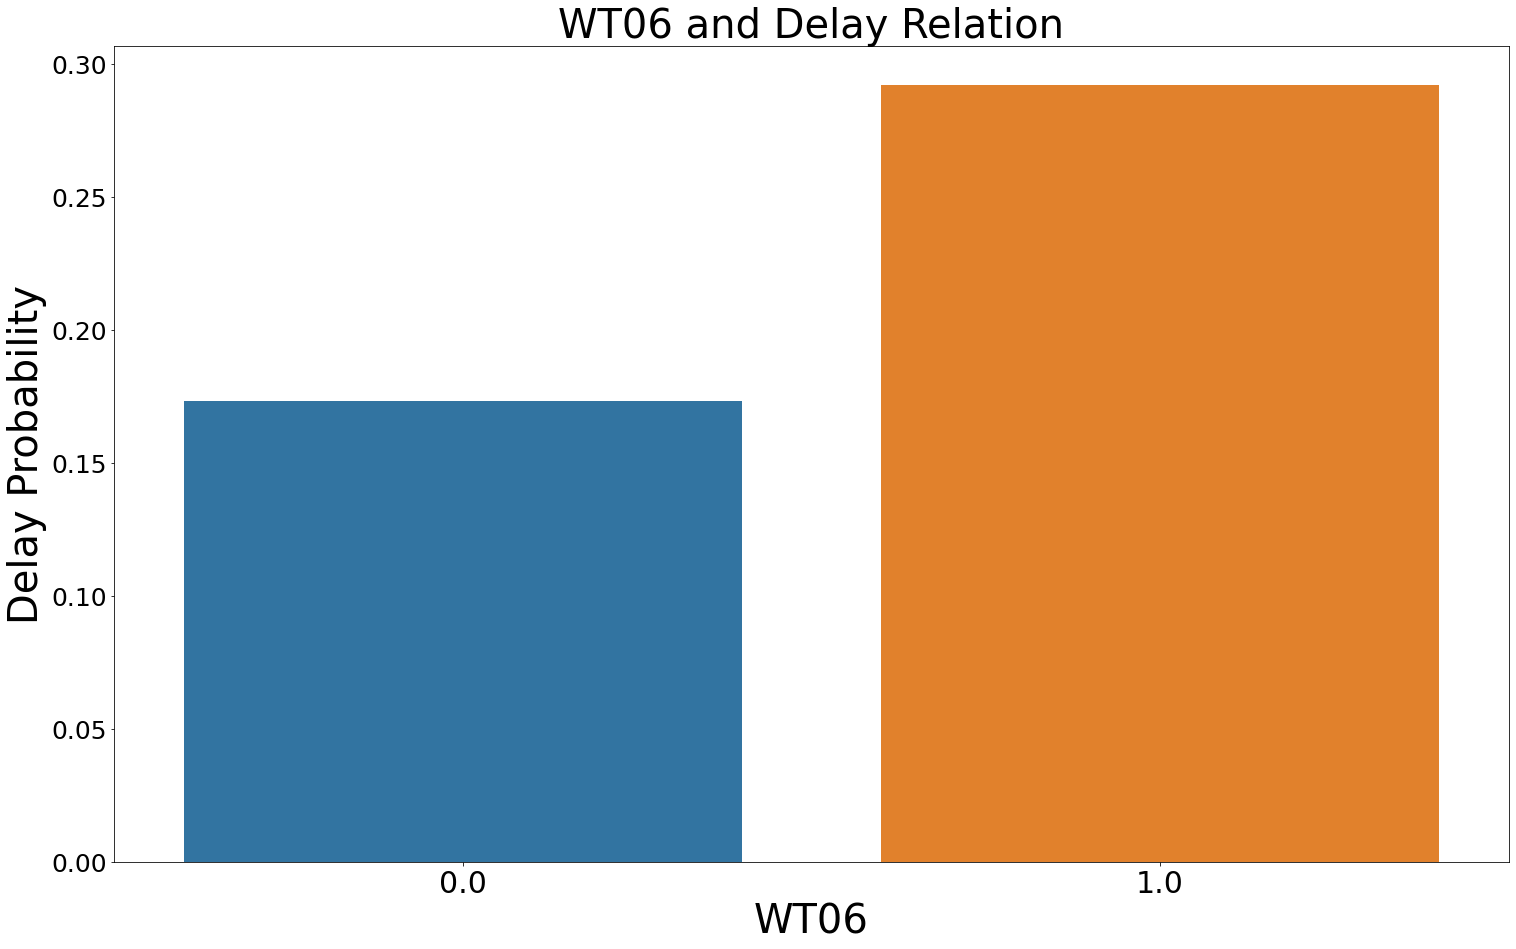

In [29]:
wtxx = data['WT06'].value_counts().index
train_group = data.groupby('WT06')
train_mean_y = train_group['ArrDel15'].agg([lambda x:np.mean(x)])

fig, ax = plt.subplots(figsize = (25,15))
sns.barplot(wtxx, train_mean_y.loc[quarter].values[:,0])
plt.xlabel('WT06',fontsize=40)
plt.ylabel('Delay Probability',fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title('WT06 and Delay Relation',fontsize=40)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


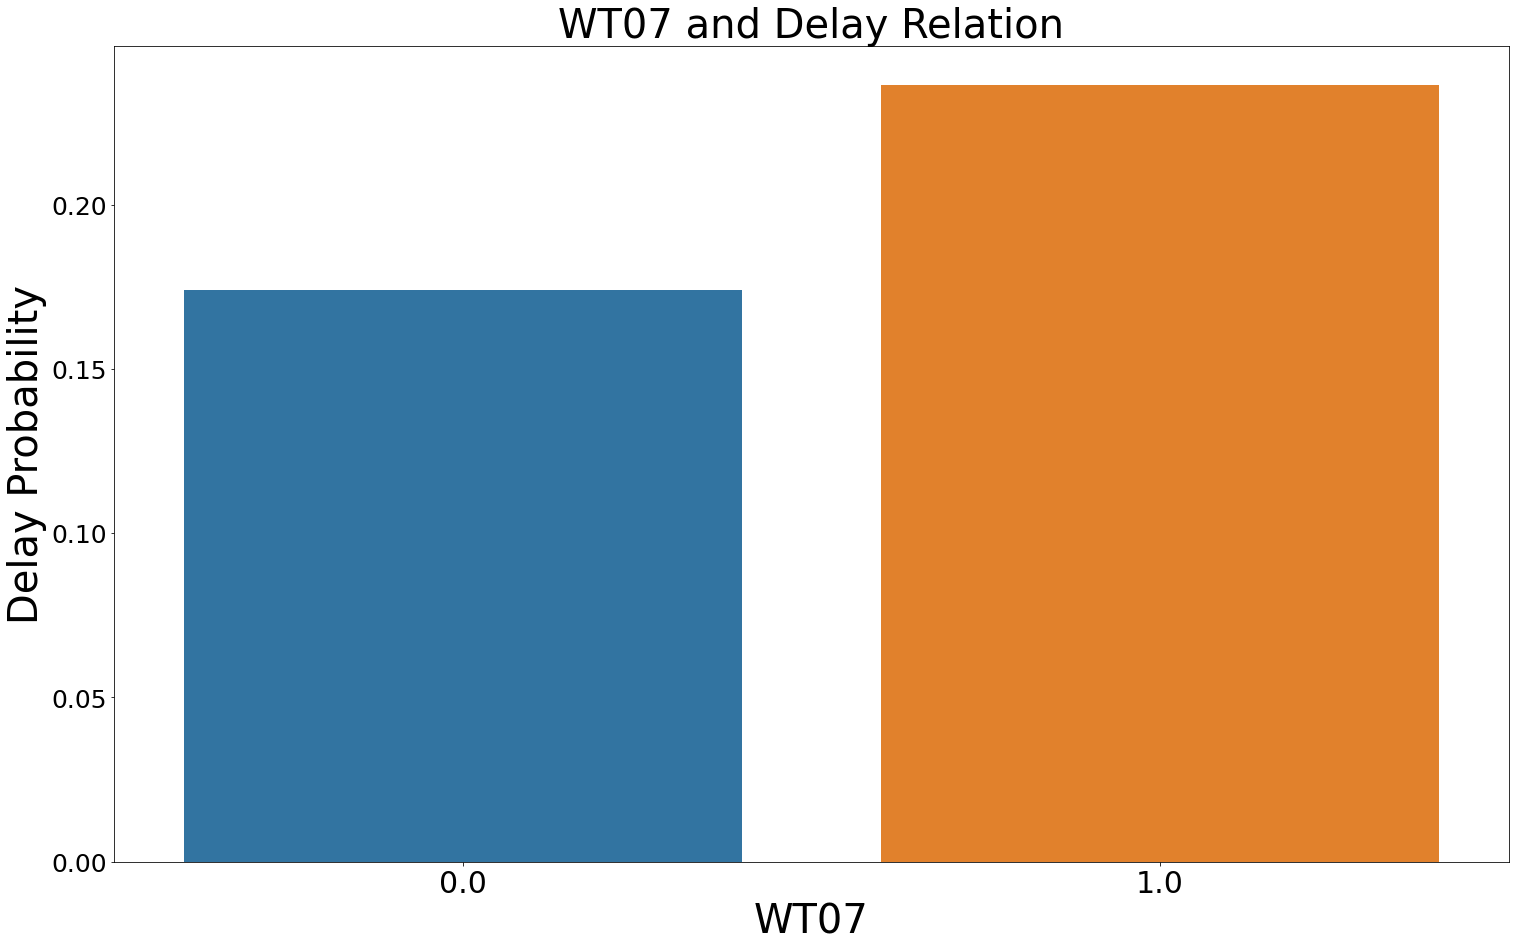

In [30]:
wtxx = data['WT07'].value_counts().index
train_group = data.groupby('WT07')
train_mean_y = train_group['ArrDel15'].agg([lambda x:np.mean(x)])

fig, ax = plt.subplots(figsize = (25,15))
sns.barplot(wtxx, train_mean_y.loc[quarter].values[:,0])
plt.xlabel('WT07',fontsize=40)
plt.ylabel('Delay Probability',fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title('WT07 and Delay Relation',fontsize=40)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


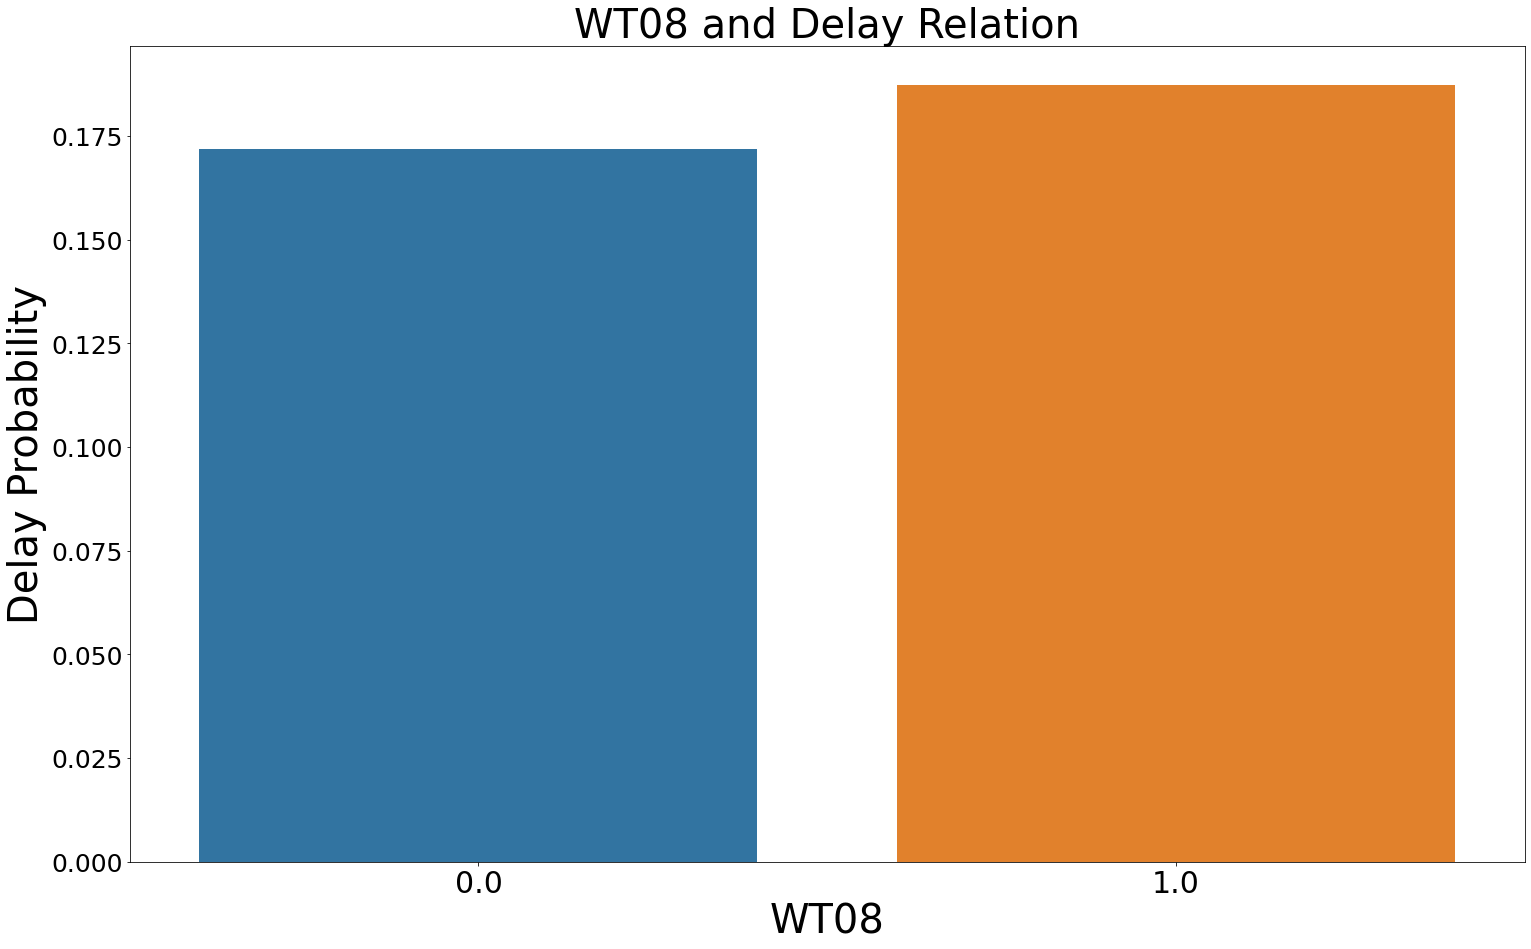

In [31]:
wtxx = data['WT08'].value_counts().index
train_group = data.groupby('WT08')
train_mean_y = train_group['ArrDel15'].agg([lambda x:np.mean(x)])

fig, ax = plt.subplots(figsize = (25,15))
sns.barplot(wtxx, train_mean_y.loc[quarter].values[:,0])
plt.xlabel('WT08',fontsize=40)
plt.ylabel('Delay Probability',fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title('WT08 and Delay Relation',fontsize=40)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


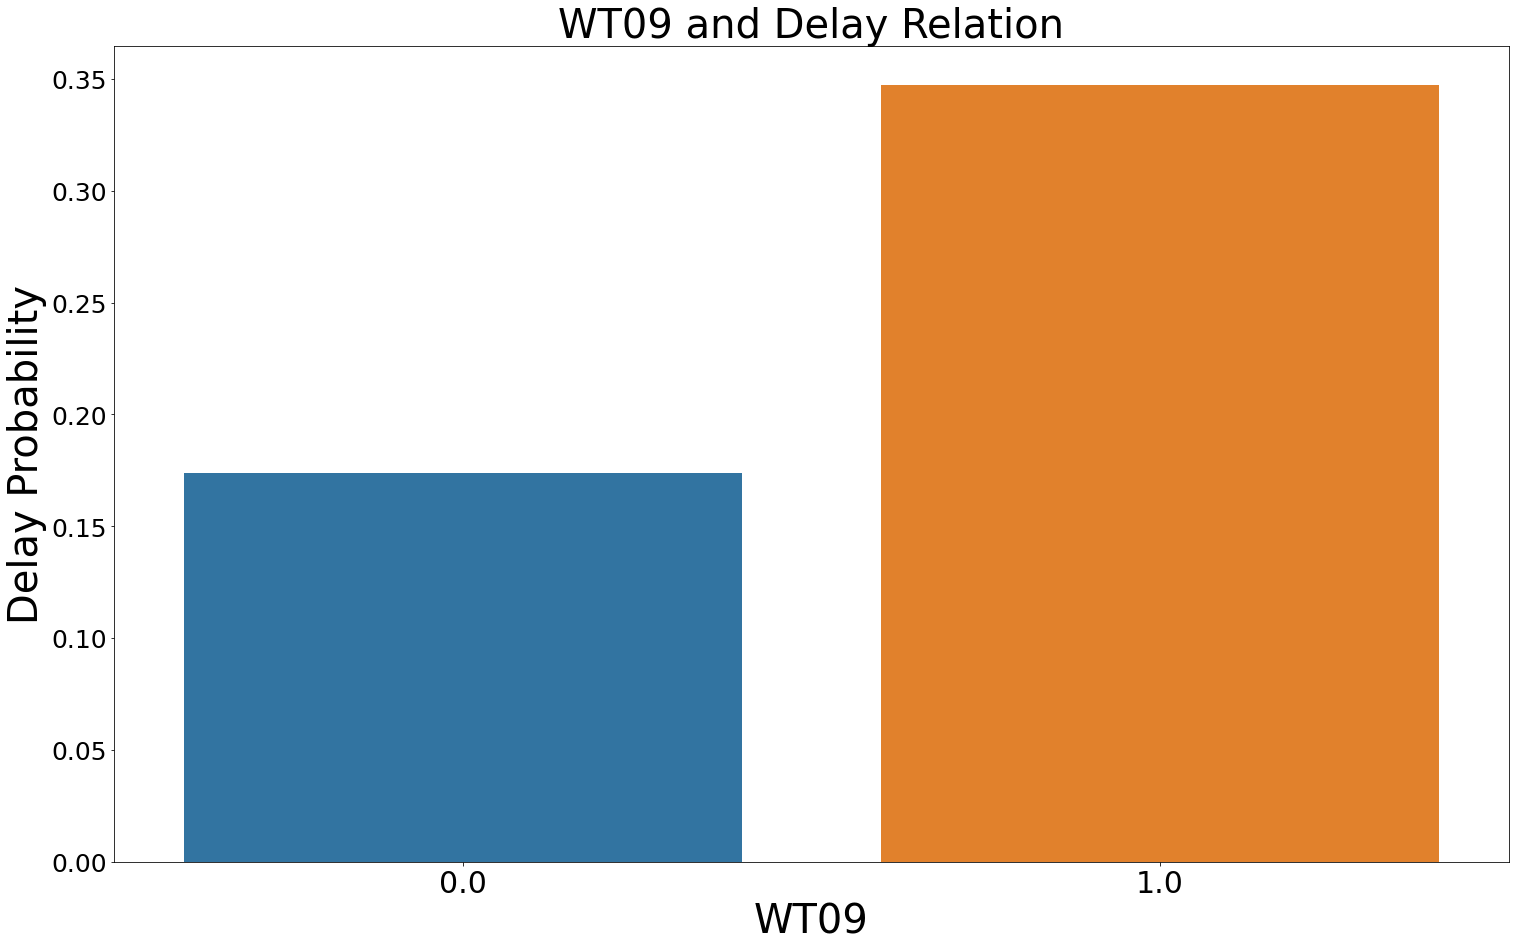

In [32]:
wtxx = data['WT09'].value_counts().index
train_group = data.groupby('WT09')
train_mean_y = train_group['ArrDel15'].agg([lambda x:np.mean(x)])

fig, ax = plt.subplots(figsize = (25,15))
sns.barplot(wtxx, train_mean_y.loc[quarter].values[:,0])
plt.xlabel('WT09',fontsize=40)
plt.ylabel('Delay Probability',fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title('WT09 and Delay Relation',fontsize=40)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


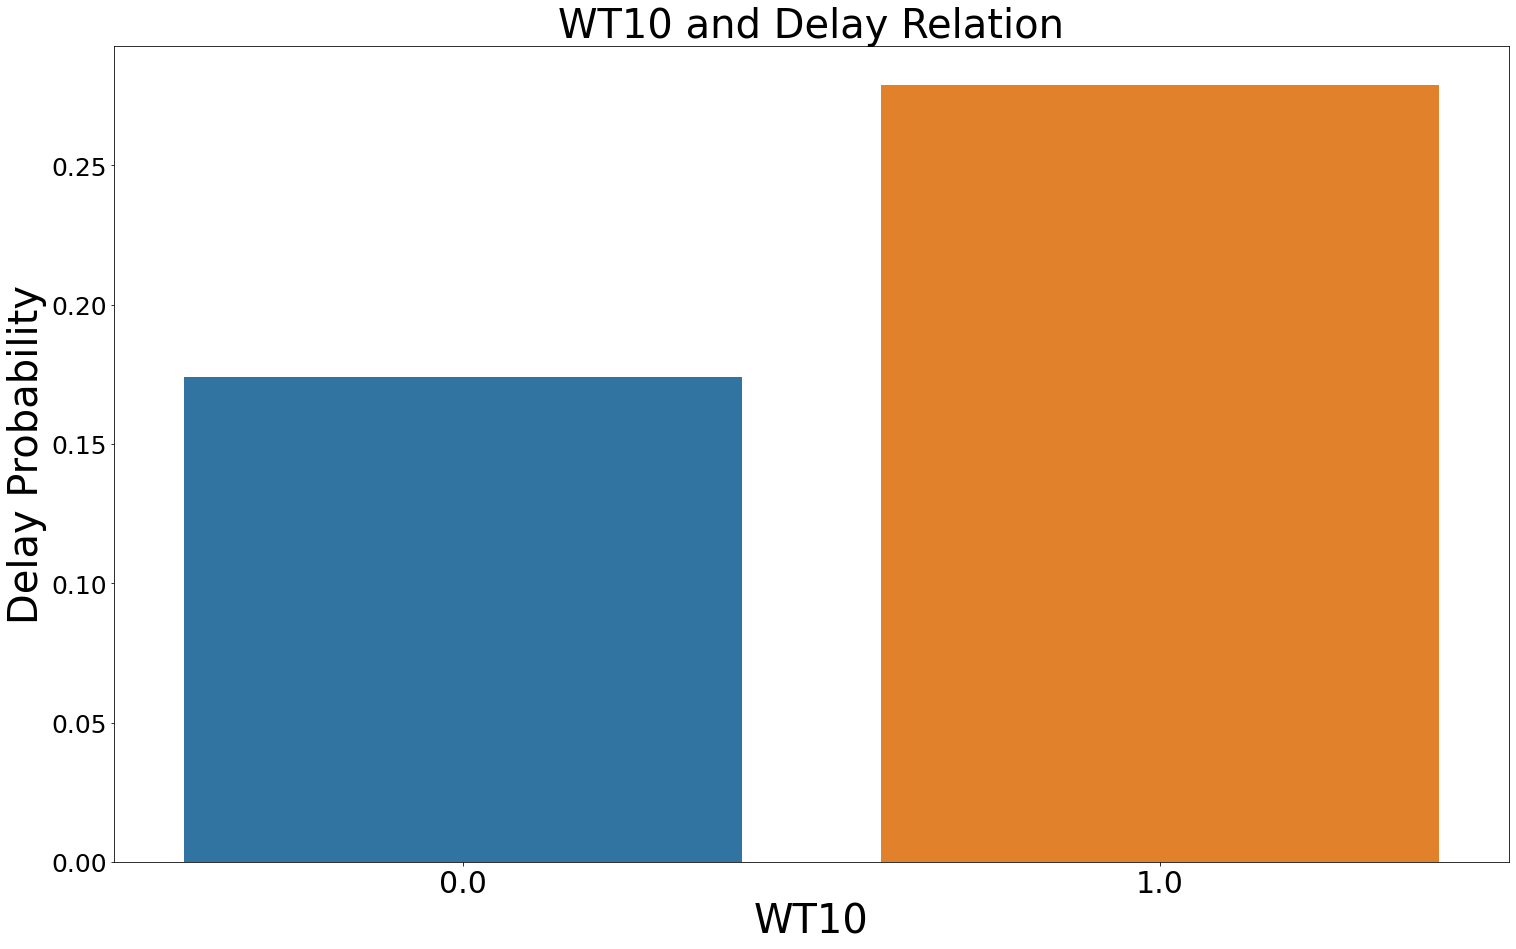

In [33]:
wtxx = data['WT10'].value_counts().index
train_group = data.groupby('WT10')
train_mean_y = train_group['ArrDel15'].agg([lambda x:np.mean(x)])

fig, ax = plt.subplots(figsize = (25,15))
sns.barplot(wtxx, train_mean_y.loc[quarter].values[:,0])
plt.xlabel('WT10',fontsize=40)
plt.ylabel('Delay Probability',fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title('WT10 and Delay Relation',fontsize=40)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


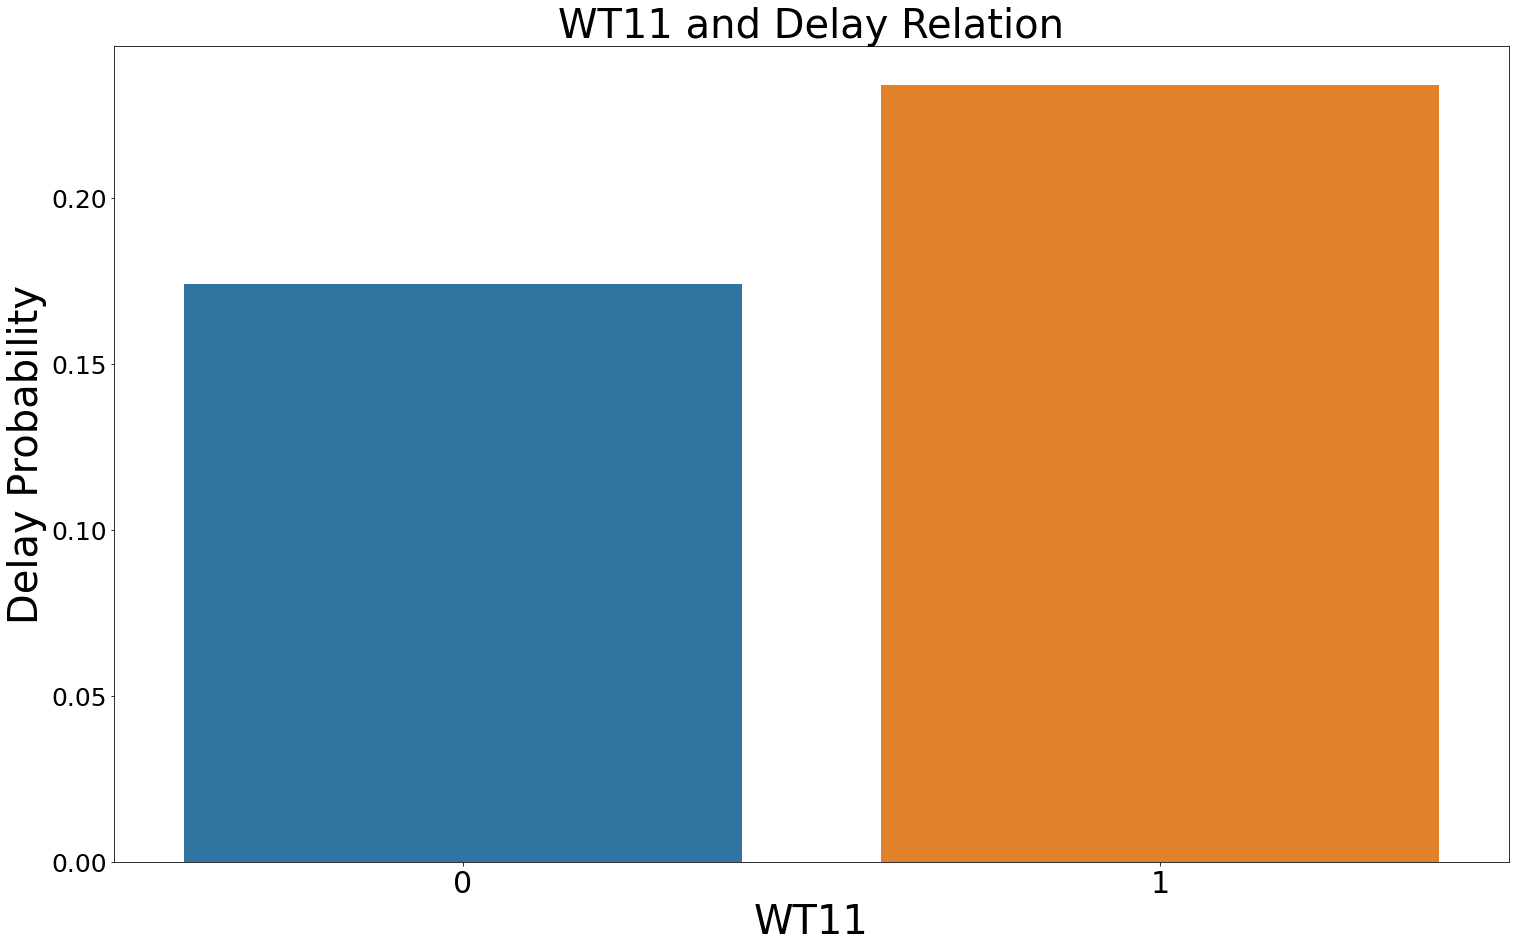

In [34]:
wtxx = data['WT11'].value_counts().index
train_group = data.groupby('WT11')
train_mean_y = train_group['ArrDel15'].agg([lambda x:np.mean(x)])

fig, ax = plt.subplots(figsize = (25,15))
sns.barplot(wtxx, train_mean_y.loc[quarter].values[:,0])
plt.xlabel('WT11',fontsize=40)
plt.ylabel('Delay Probability',fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title('WT11 and Delay Relation',fontsize=40)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


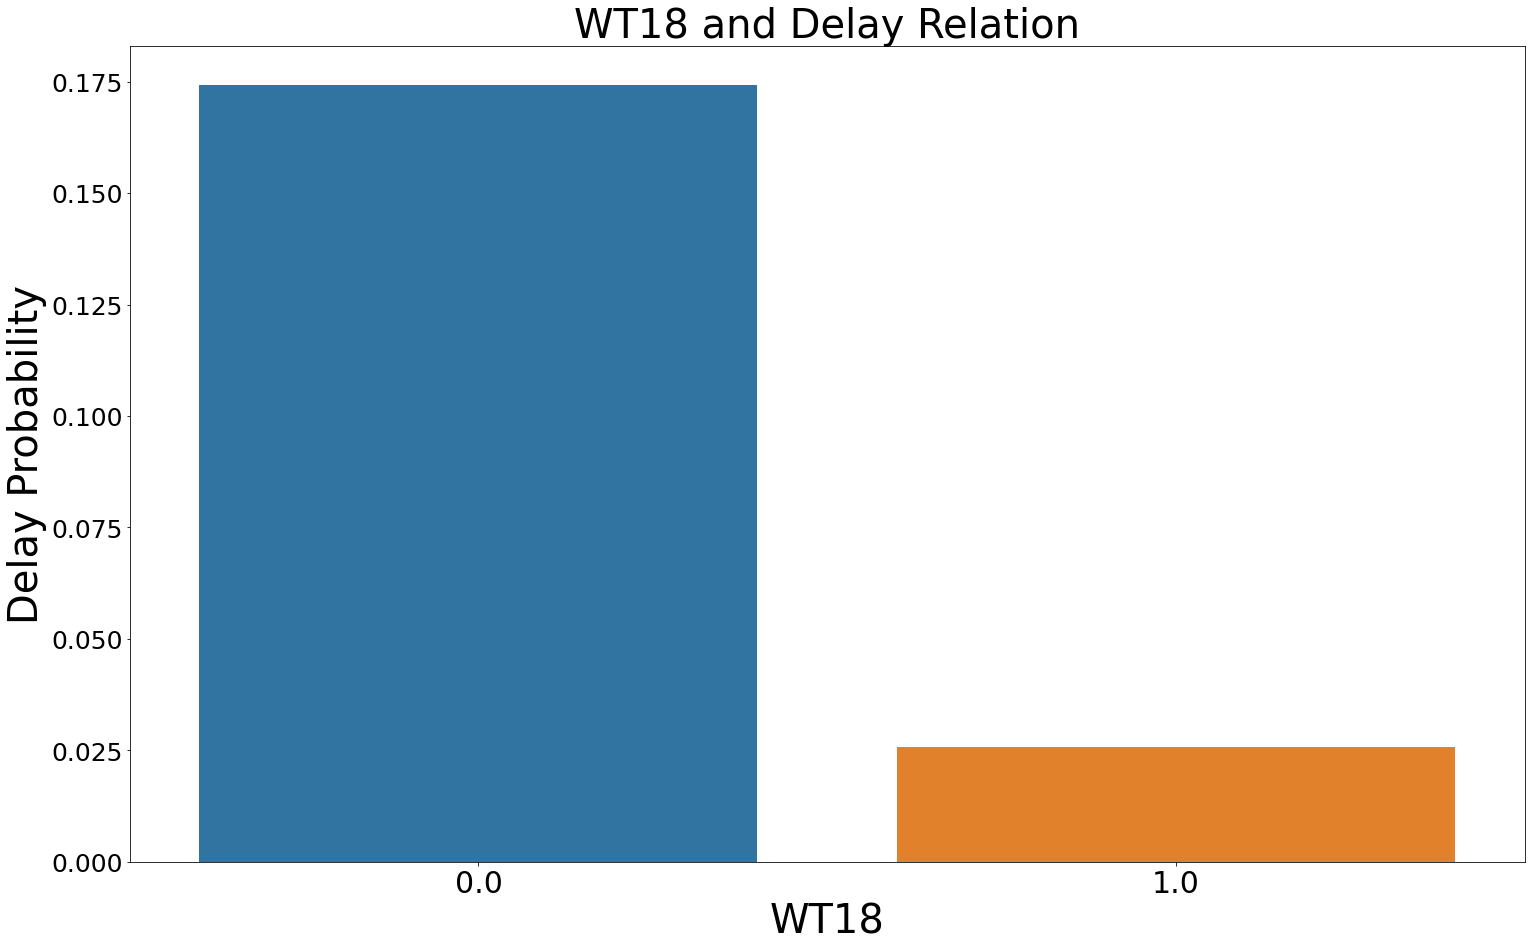

In [35]:
wtxx = data['WT18'].value_counts().index
train_group = data.groupby('WT18')
train_mean_y = train_group['ArrDel15'].agg([lambda x:np.mean(x)])

fig, ax = plt.subplots(figsize = (25,15))
sns.barplot(wtxx, train_mean_y.loc[quarter].values[:,0])
plt.xlabel('WT18',fontsize=40)
plt.ylabel('Delay Probability',fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title('WT18 and Delay Relation',fontsize=40)
plt.show()